In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import json, pickle, os
import pandas as pd
import numpy as np
import random
import copy

from dataset.dataset_alzheimer import *
from train.train import *
from models.models import *

In [3]:
with open('./dataset/dataset_config.json', 'r') as f:
    dataset_path = json.load(f)['dataset_path']

In [4]:
with open(dataset_path + "data_alzheimer_4labels.pkl", 'rb') as f:
    data = pickle.load(f)

In [5]:
print(f'X_train shape: {np.shape(data.X_train)}, y_train shape: {np.shape(data.y_train)}')
print(f'X_val shape: {np.shape(data.X_val)}, y_val shape: {np.shape(data.y_val)}')

X_train shape: (36346, 224, 224, 1), y_train shape: (36346, 4)
X_val shape: (4038, 224, 224, 1), y_val shape: (4038, 4)


In [7]:
output_dir = "../results_training_pruebas/"
os.makedirs(output_dir, exist_ok=True)

## Label variation

In [7]:
y_train = np.copy(data.y_train)
y_train_modified = np.copy(y_train)

num_classes = y_train.shape[1]
num_samples = len(y_train)
noise_ratio = 0.5
num_noisy = int(num_samples * noise_ratio)

np.random.seed(42)
indices_to_modify = np.random.choice(num_samples, size=num_noisy, replace=False)

for idx in indices_to_modify:
    original_label = np.argmax(y_train_modified[idx])
    new_label = random.choice([i for i in range(num_classes) if i != original_label])
    y_train_modified[idx] = np.zeros(num_classes)
    y_train_modified[idx][new_label] = 1.0

In [8]:
data_noisy = copy.copy(data)
data_noisy.y_train = y_train_modified

In [9]:
print(f'X_train shape: {np.shape(data_noisy.X_train)}, y_train shape: {np.shape(data_noisy.y_train)}')
print(f'X_val shape: {np.shape(data_noisy.X_val)}, y_val shape: {np.shape(data_noisy.y_val)}')

X_train shape: (36346, 224, 224, 1), y_train shape: (36346, 4)
X_val shape: (4038, 224, 224, 1), y_val shape: (4038, 4)


In [10]:
print("¿y_train == y_train_modified?", np.array_equal(data.y_train, data_noisy.y_train))  
print("¿X_train se mantiene igual?", np.array_equal(data.X_train, data_noisy.X_train)) 

¿y_train == y_train_modified? False
¿X_train se mantiene igual? True


In [11]:
original_classes = np.argmax(data.y_train, axis=1)
modified_classes = np.argmax(data_noisy.y_train, axis=1)
num_changed = np.sum(original_classes != modified_classes)

print(f"Etiquetas modificadas en data_noisy: {num_changed} / {num_samples} ({100 * num_changed / num_samples:.2f}%)")

Etiquetas modificadas en data_noisy: 18173 / 36346 (50.00%)


## Classifier

In [ ]:
for j in range(1, 11):
    out_path = os.path.join(output_dir, f"Classifier_{j}/")
    os.makedirs(os.path.join(out_path, "conf_matrix"), exist_ok=True)
    os.makedirs(os.path.join(out_path, "models"), exist_ok=True)
    os.makedirs(os.path.join(out_path, "reconstructions"), exist_ok=True)
    os.makedirs(os.path.join(out_path, "nn_recommendations"), exist_ok=True)

    model = DL_Model()
    model.create_classifier()

    train(data, out_path, model, "classifier")

-----COMPILING MODEL-----
-----TRAIN START-----


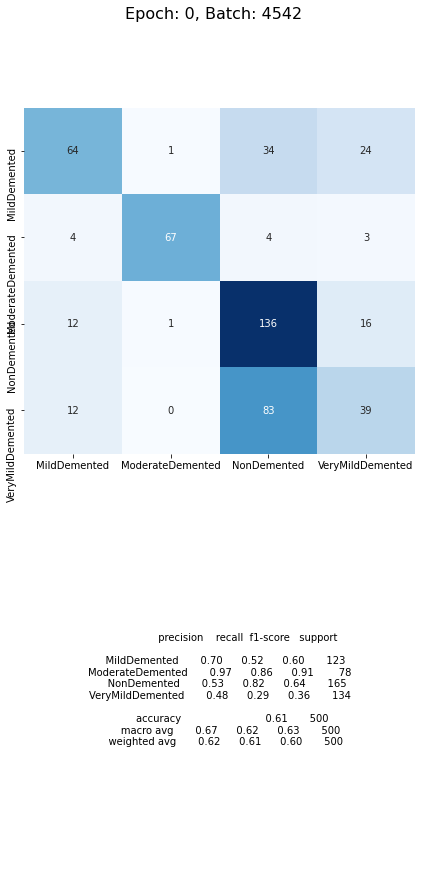

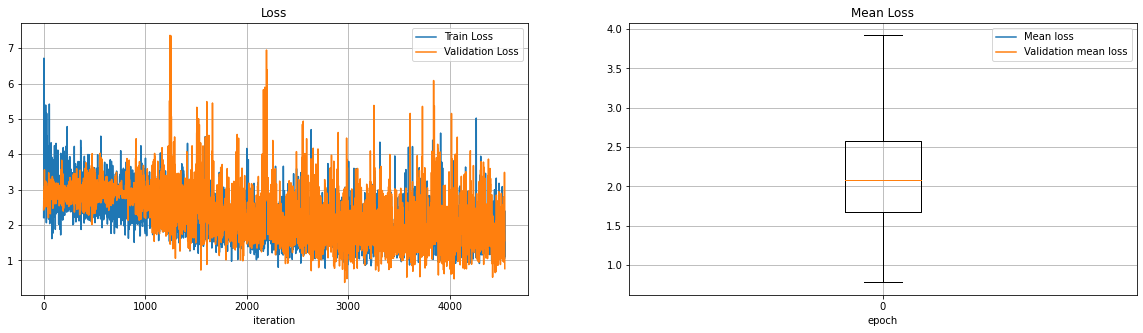

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


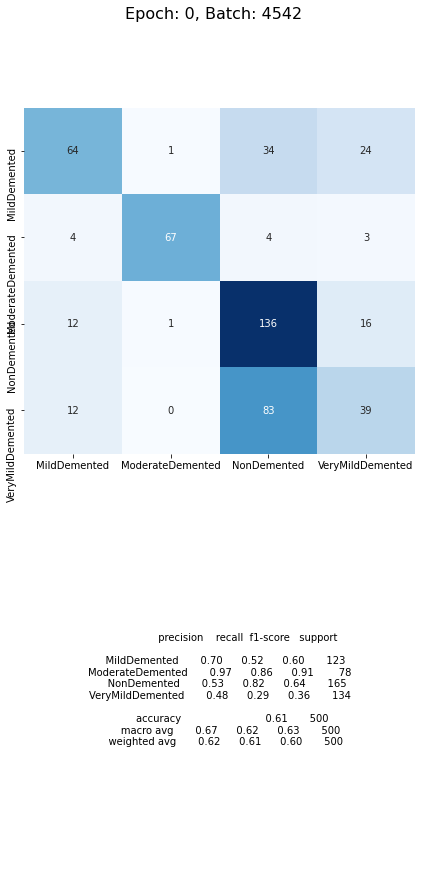

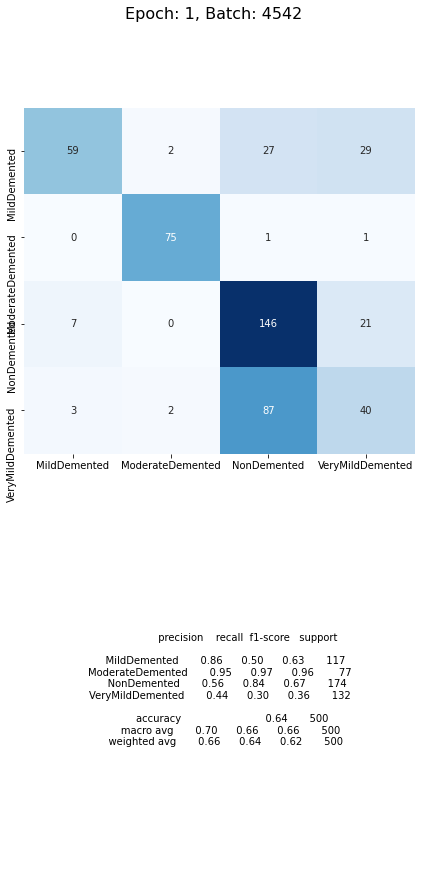

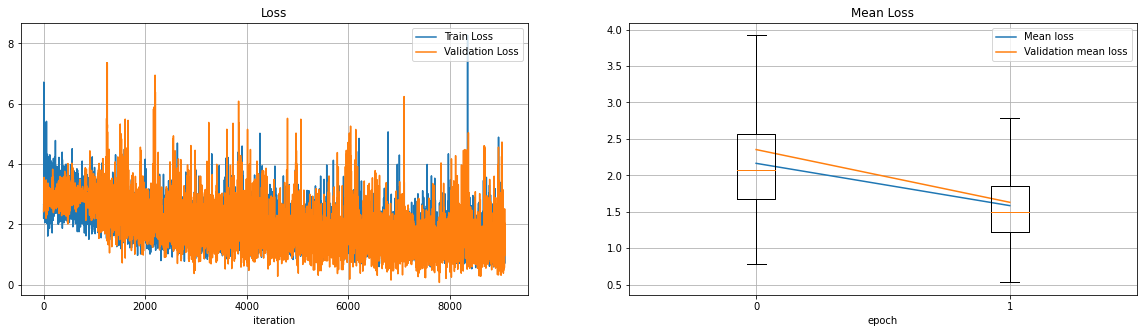

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


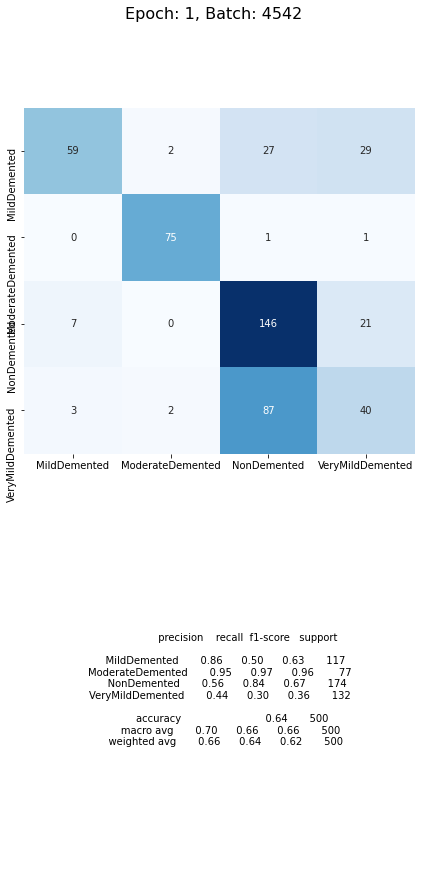

In [ ]:
#out_path = output_dir + "Classifier/"
#os.makedirs(out_path + "conf_matrix", exist_ok=True)
#os.makedirs(out_path + "models", exist_ok=True)
#os.makedirs(out_path + "reconstructions", exist_ok=True)
#os.makedirs(out_path + "nn_recommendations", exist_ok=True)

#model = DL_Model()
#model.create_classifier()

#train(dataset, out_path, model, "classifier")

## AE

In [ ]:
out_path = output_dir + "AE/"
os.makedirs(out_path + "conf_matrix", exist_ok=True)
os.makedirs(out_path + "models", exist_ok=True)
os.makedirs(out_path + "reconstructions", exist_ok=True)
os.makedirs(out_path + "nn_recommendations", exist_ok=True)

model = DL_Model()
model.create_ae()

train(dataset, out_path, model, "ae")

-----COMPILING MODEL-----
-----TRAIN START-----


## MOCAE

In [ ]:
out_path = output_dir + "MOCAE/"
os.makedirs(out_path + "conf_matrix", exist_ok=True)
os.makedirs(out_path + "models", exist_ok=True)
os.makedirs(out_path + "reconstructions", exist_ok=True)
os.makedirs(out_path + "nn_recommendations", exist_ok=True)

model = DL_Model()
model.create_mocae()

train(dataset, out_path, model, "mocae", gamma=0.01)

-----COMPILING MODEL-----
-----TRAIN START-----


## MOCVAE

-----COMPILING MODEL-----
-----TRAIN START-----


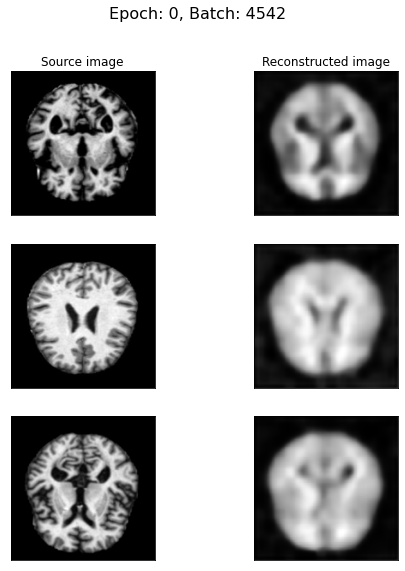

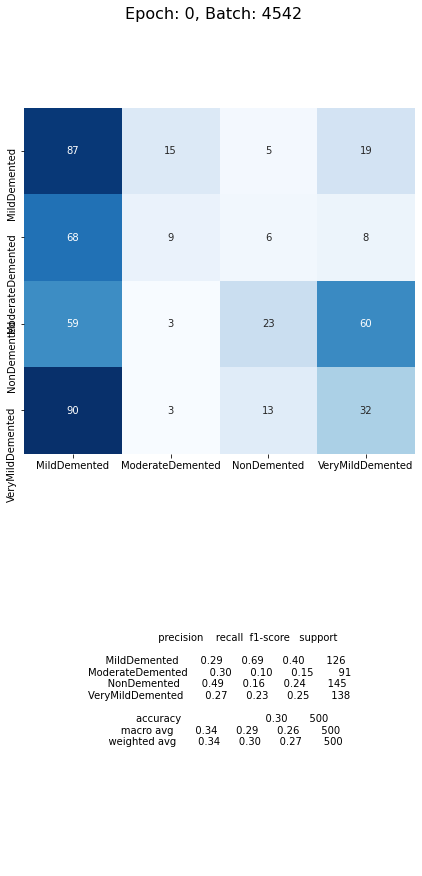

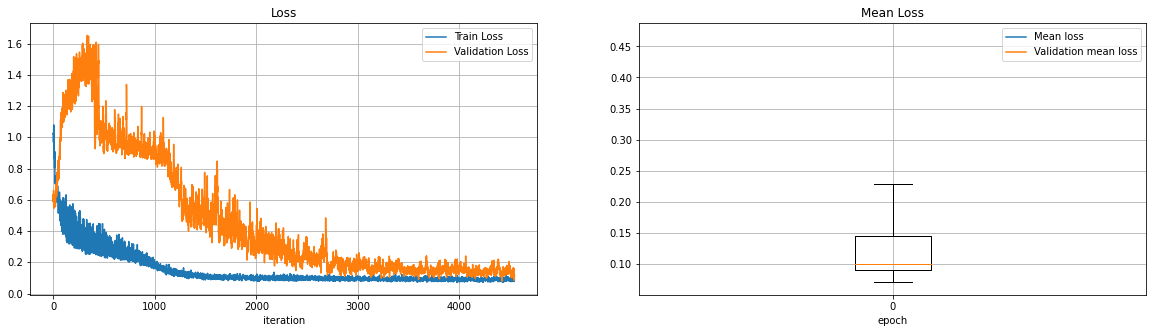

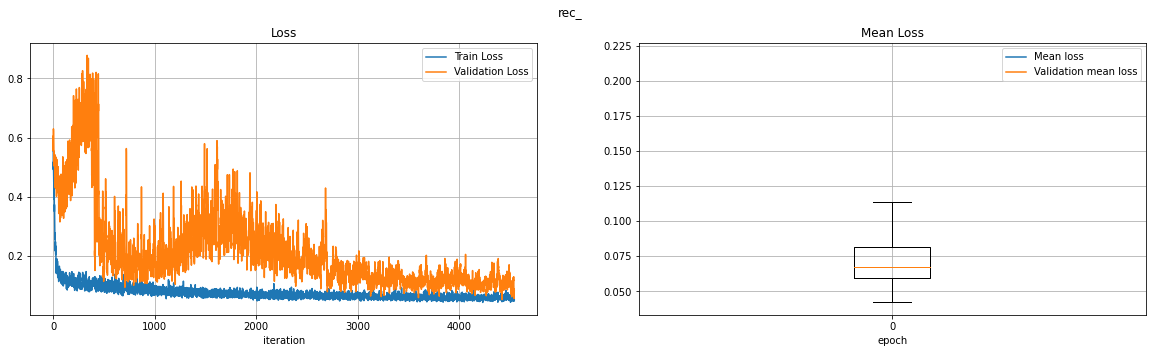

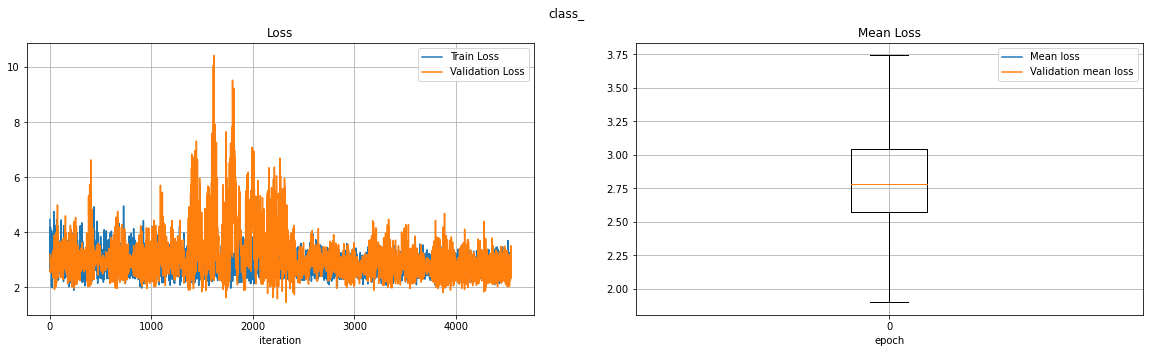

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


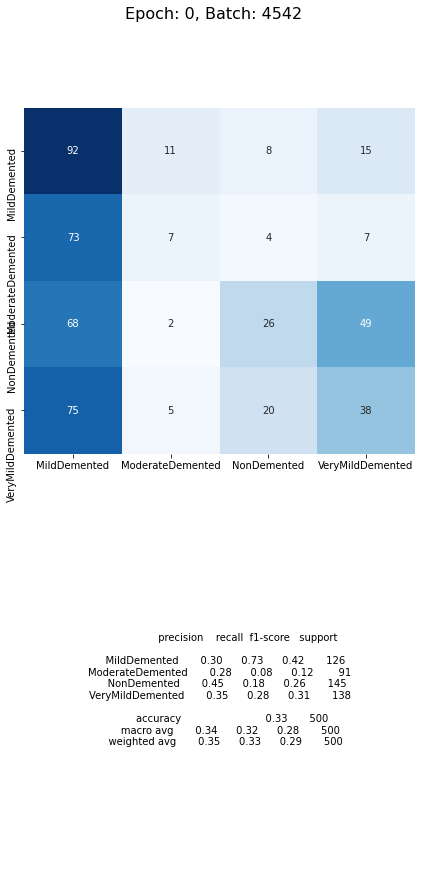

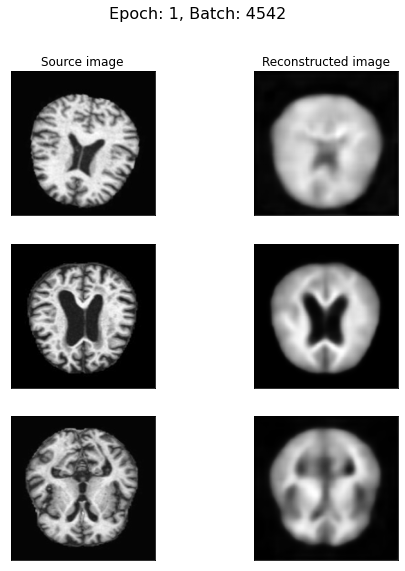

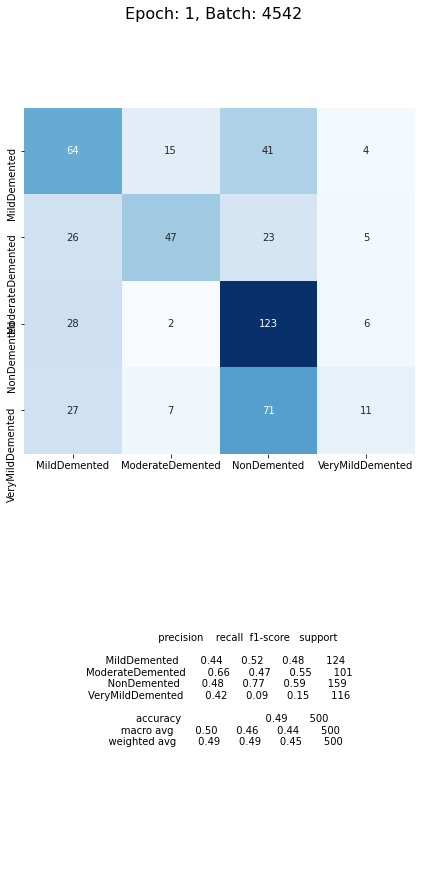

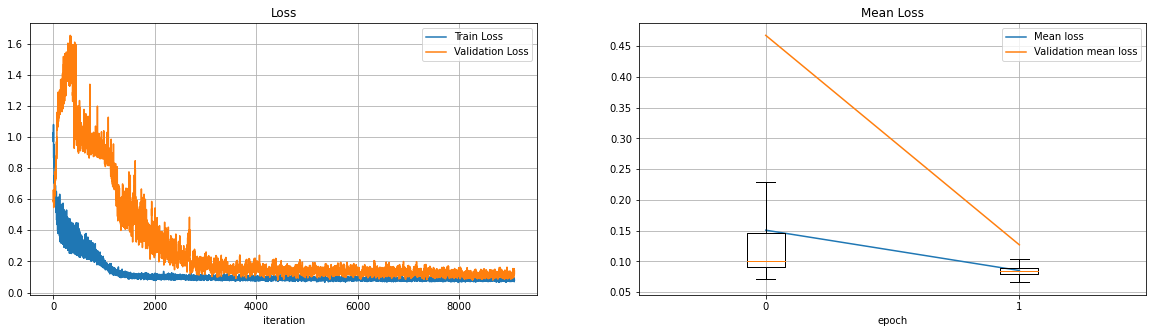

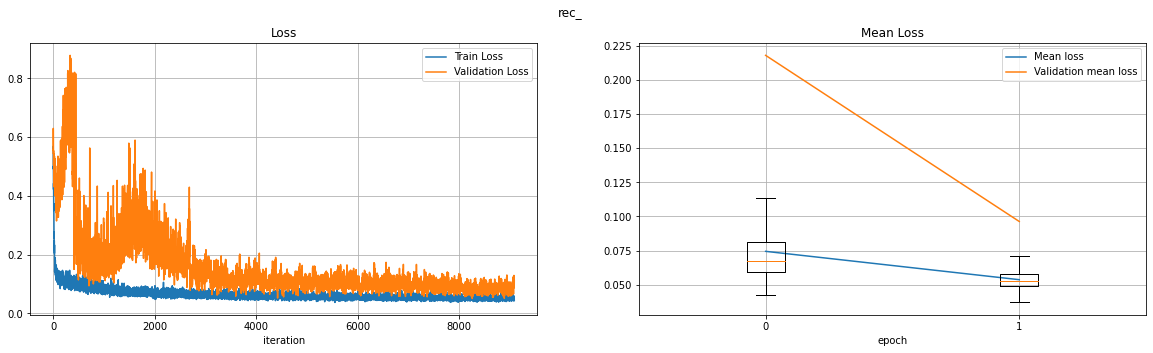

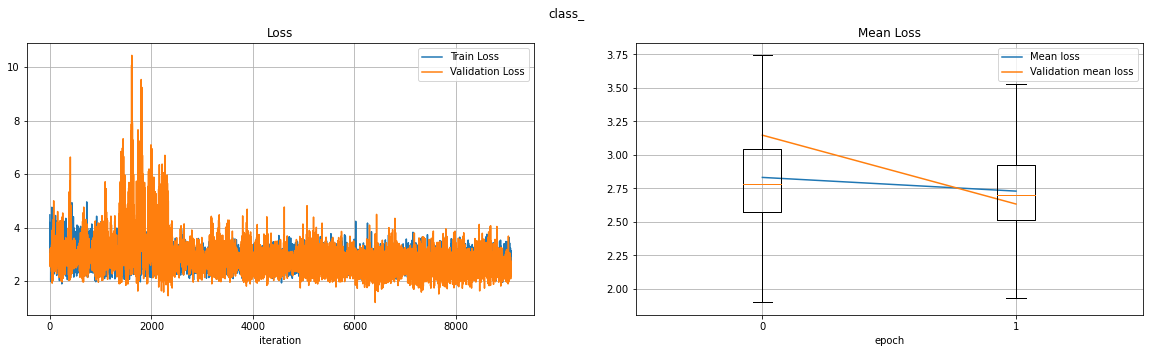

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


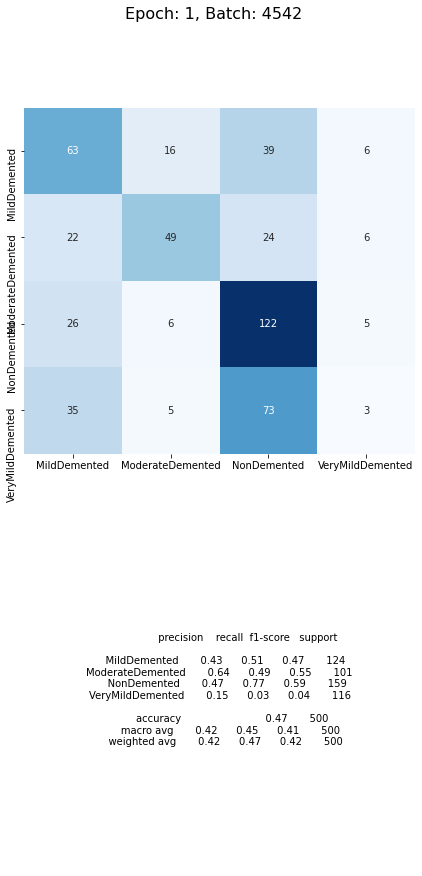

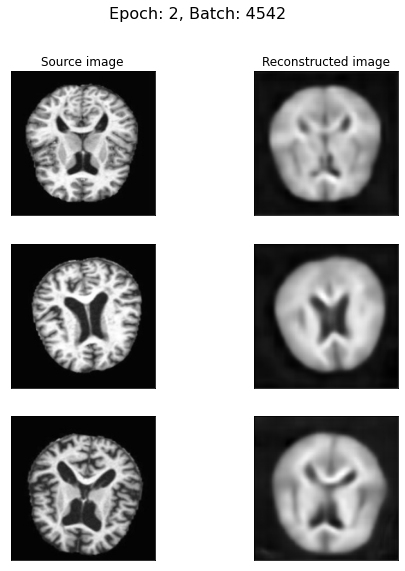

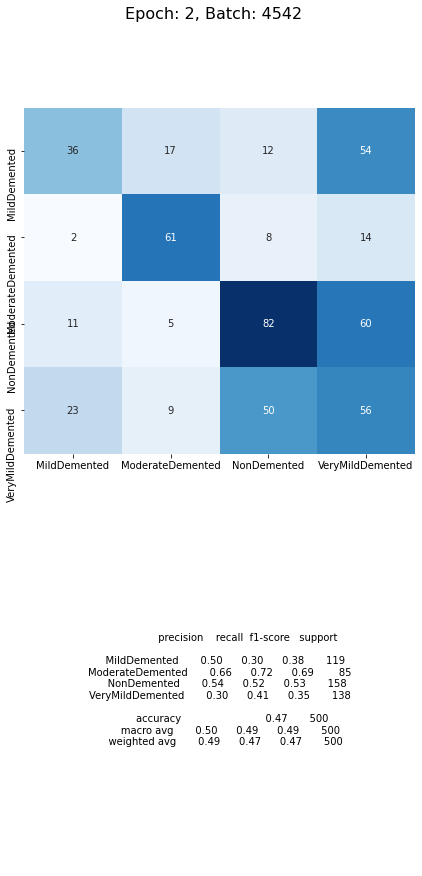

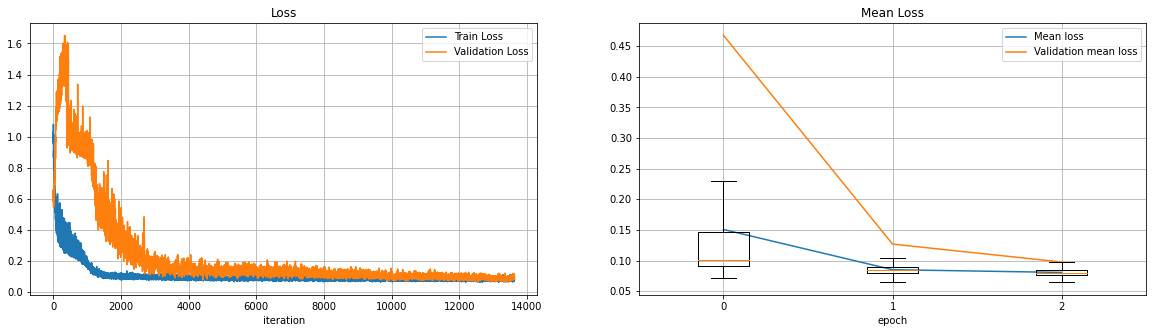

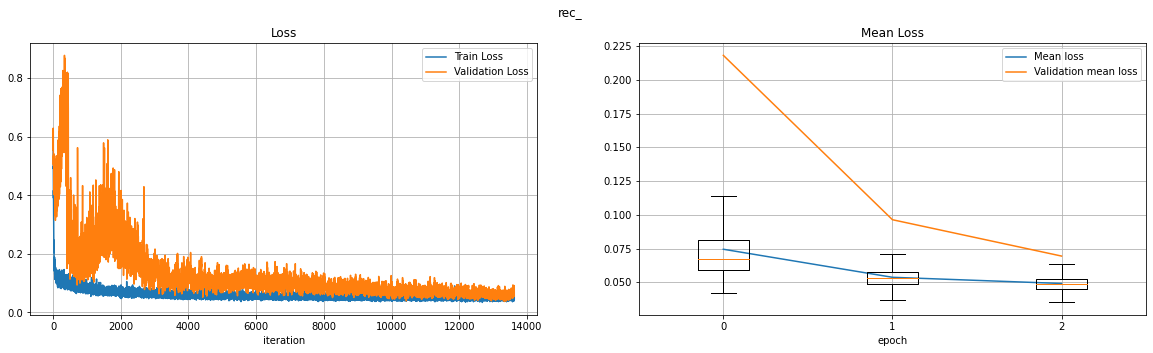

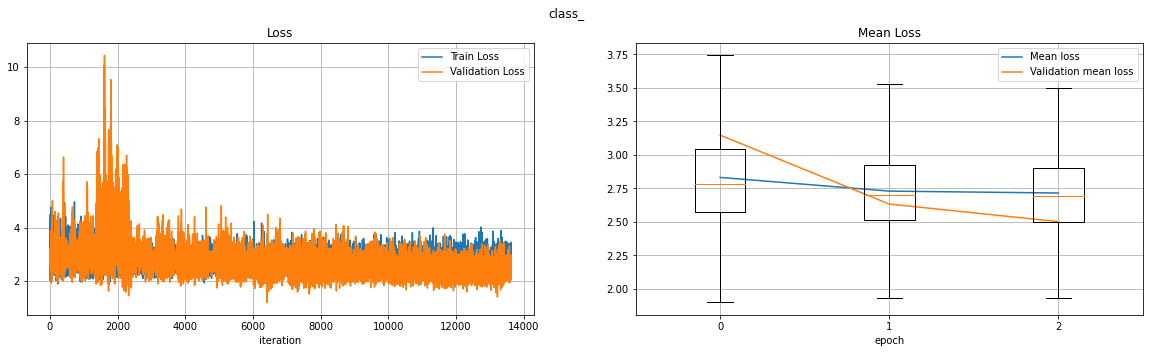

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


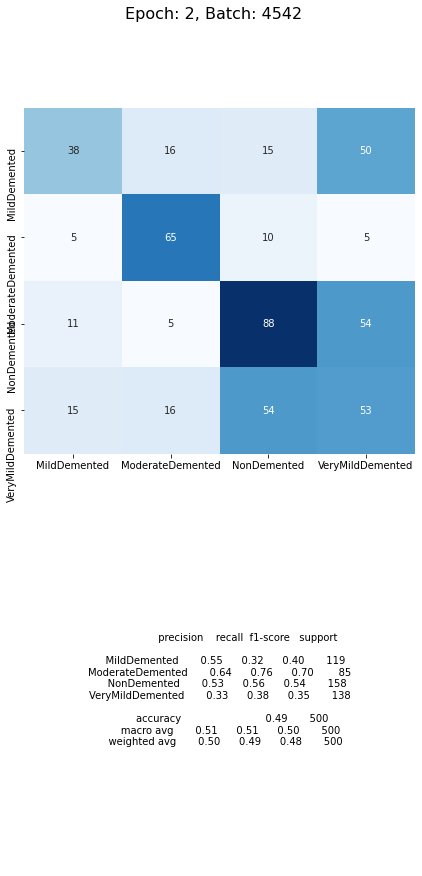

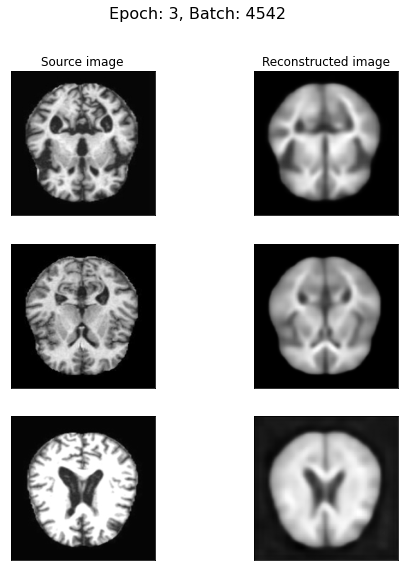

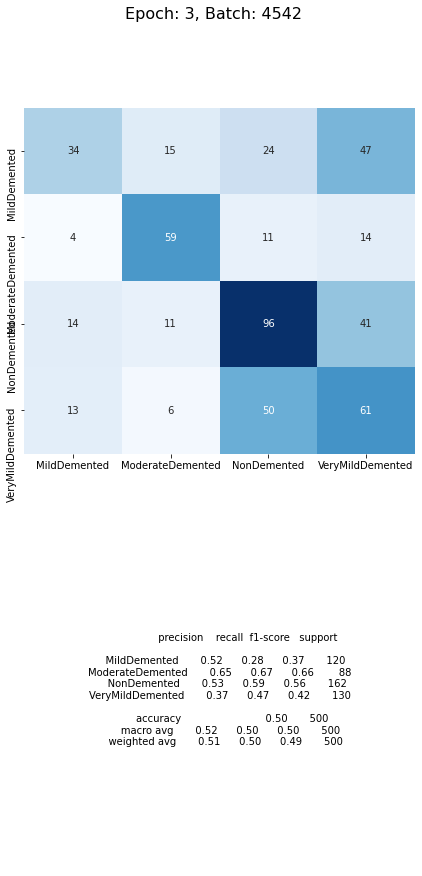

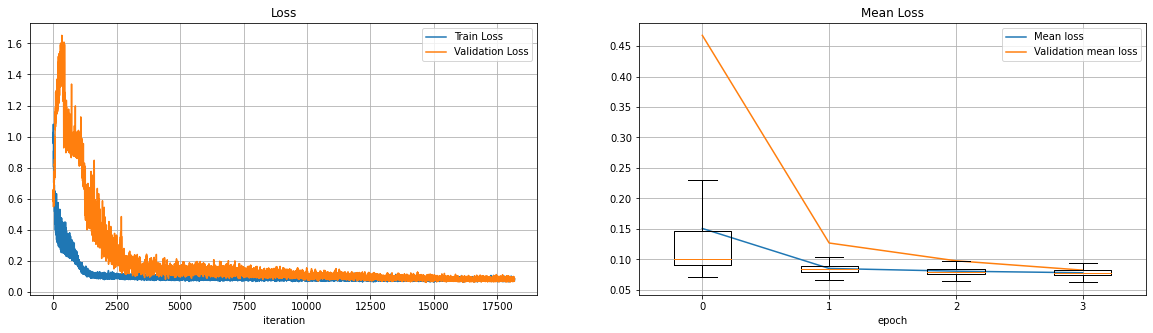

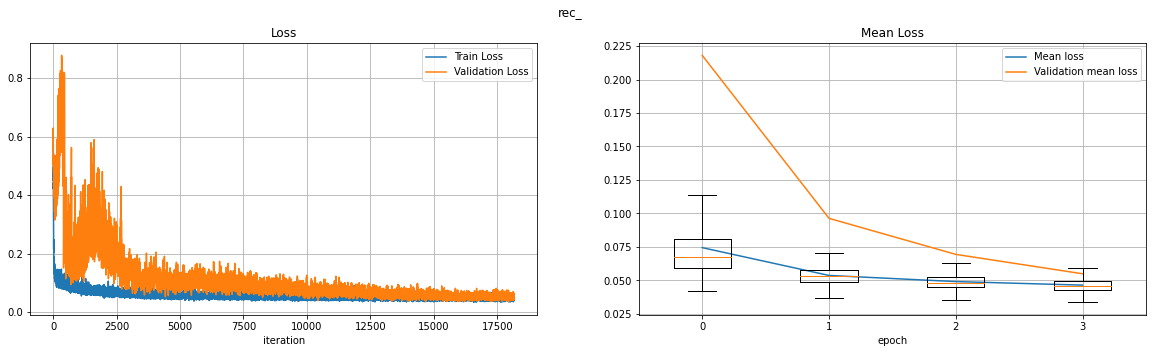

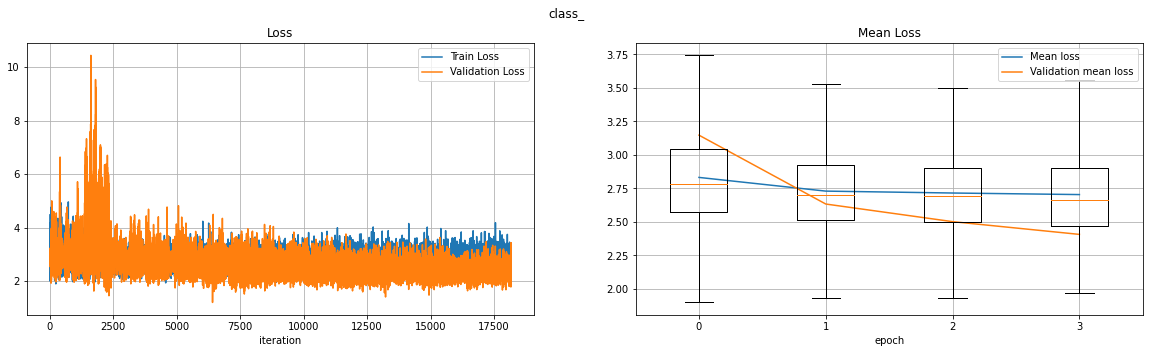

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


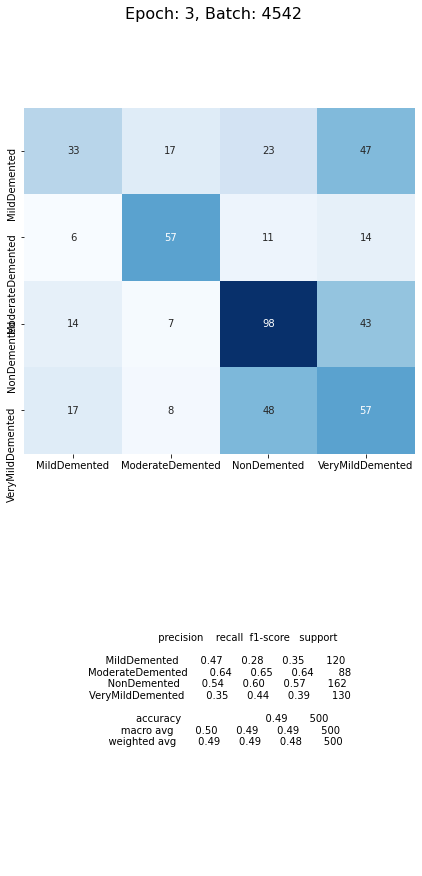

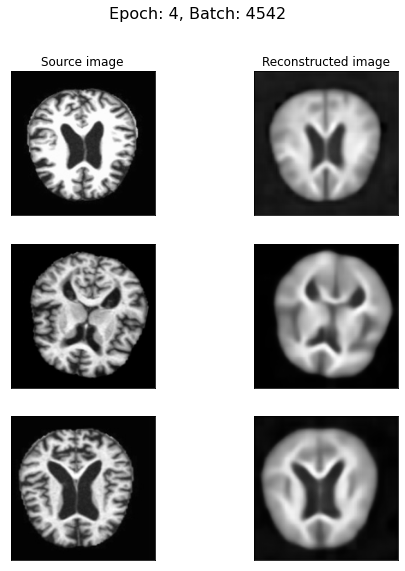

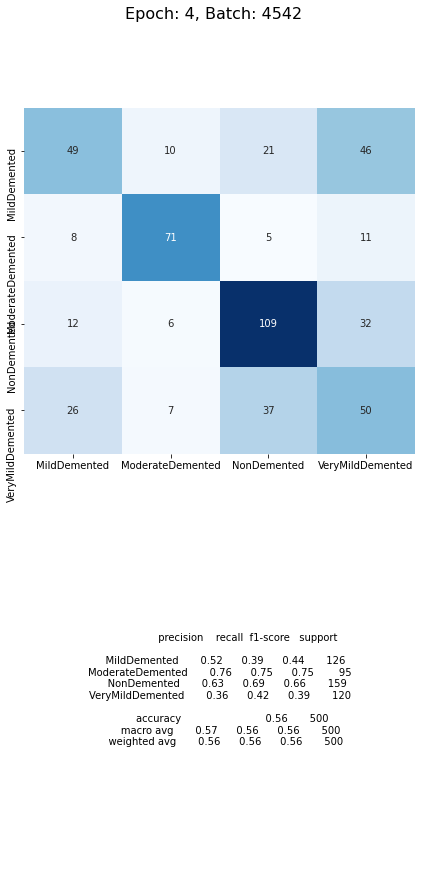

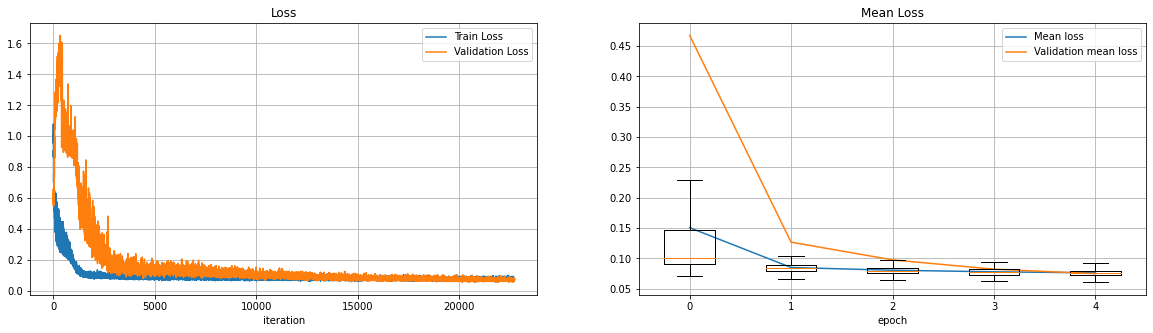

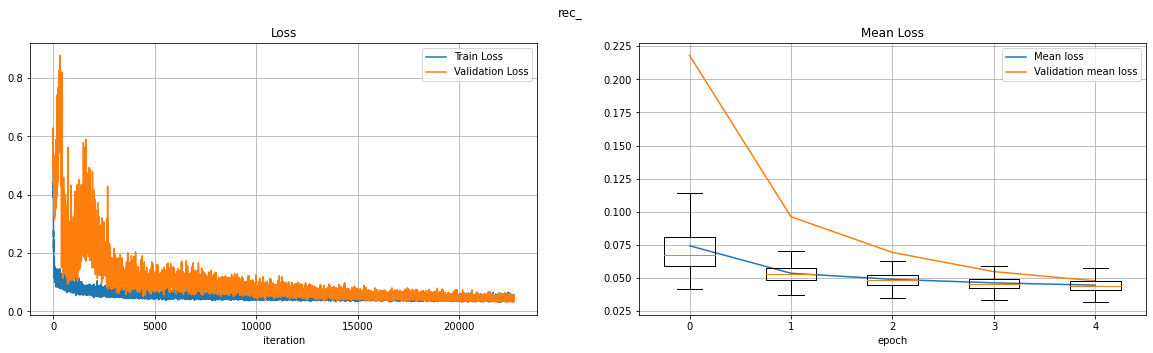

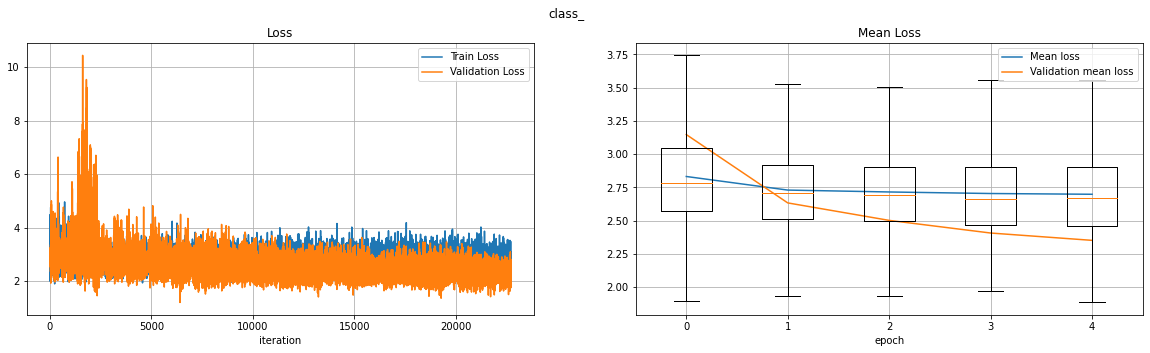

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


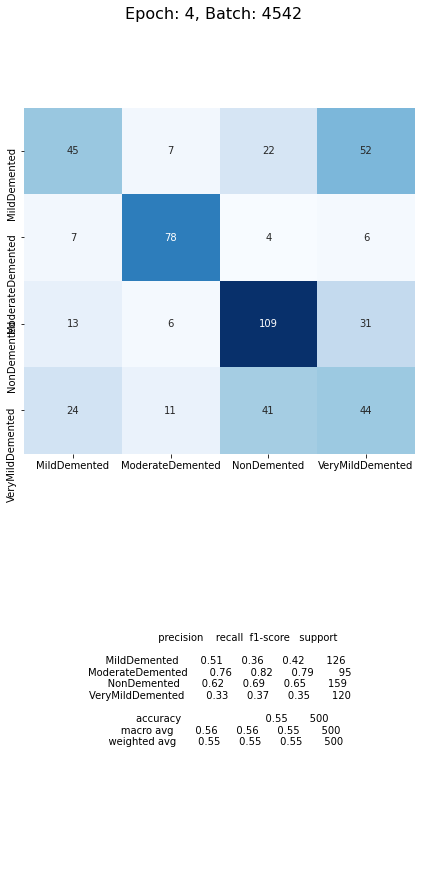

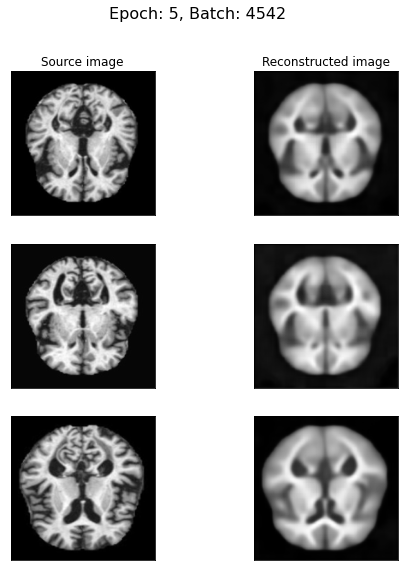

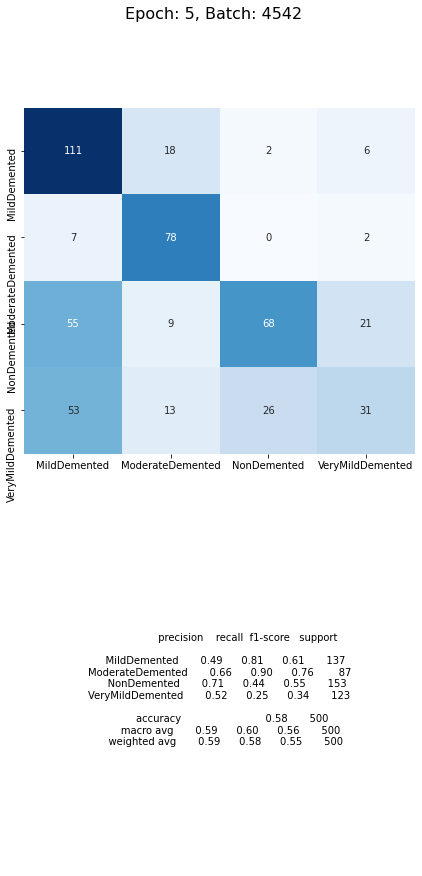

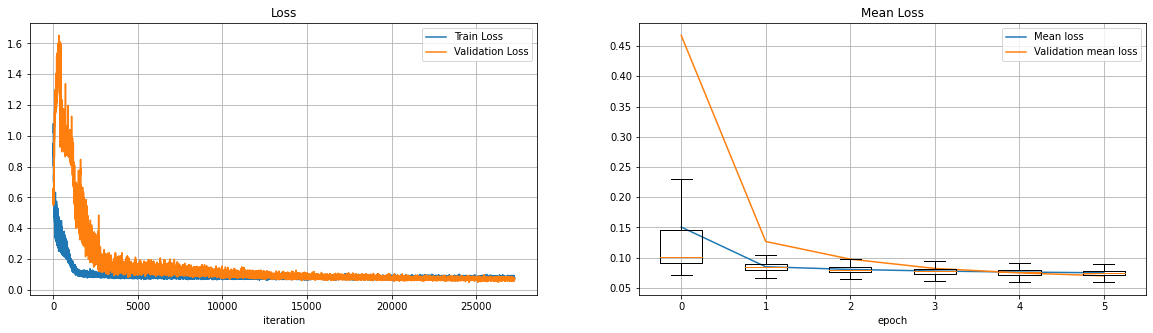

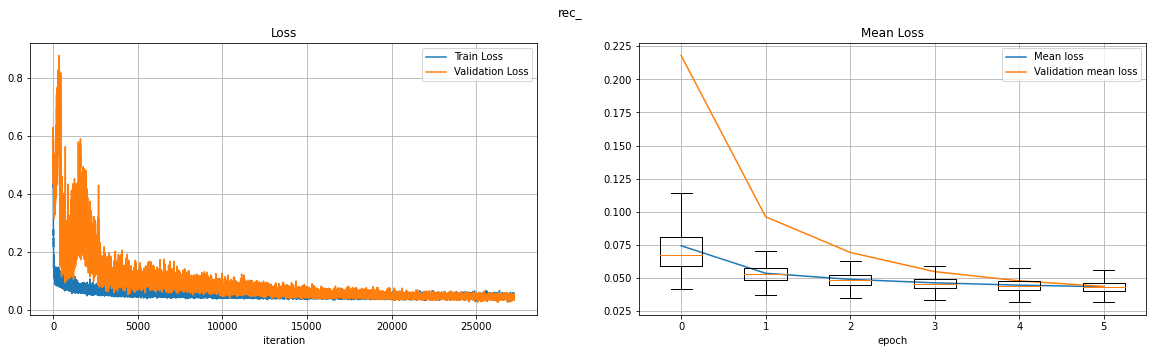

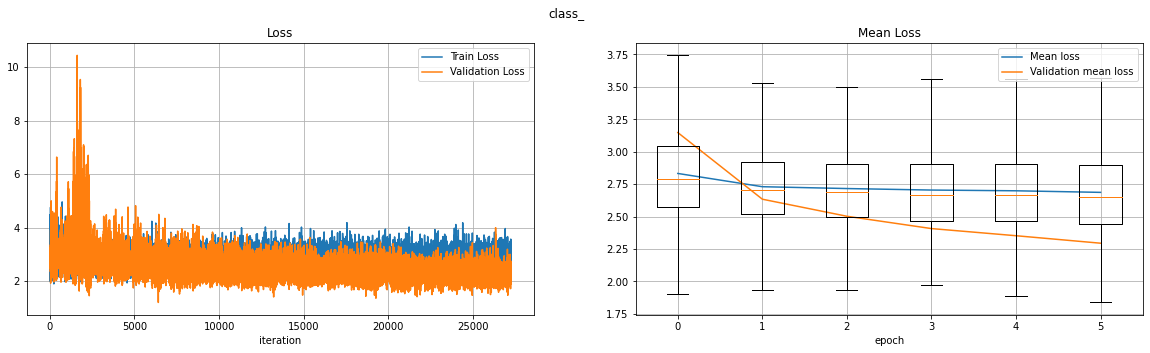

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


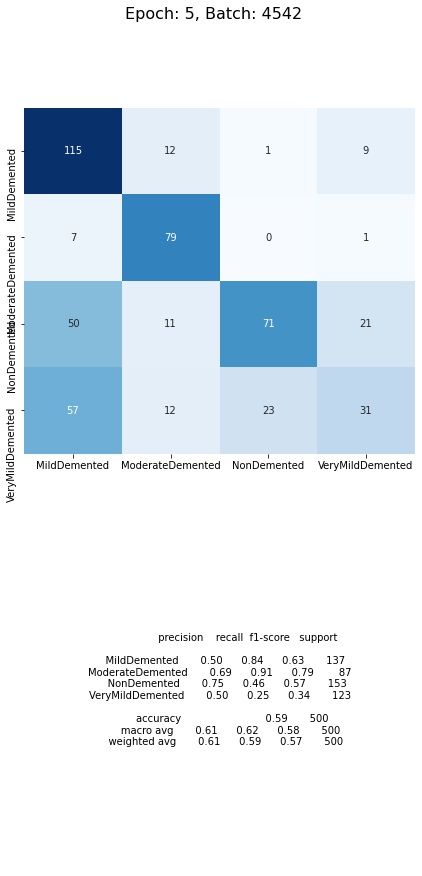

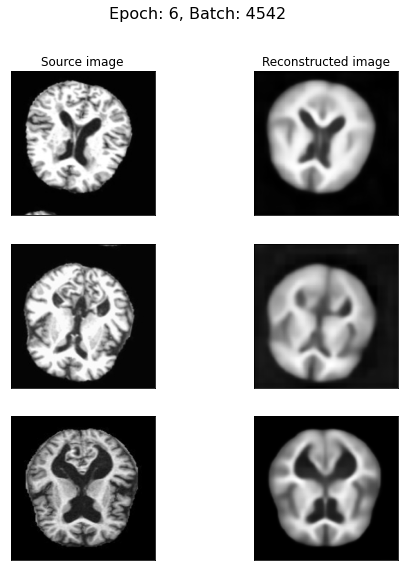

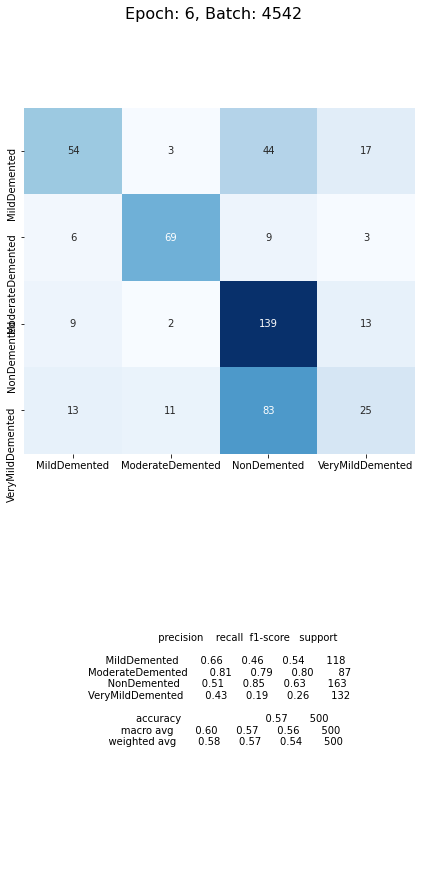

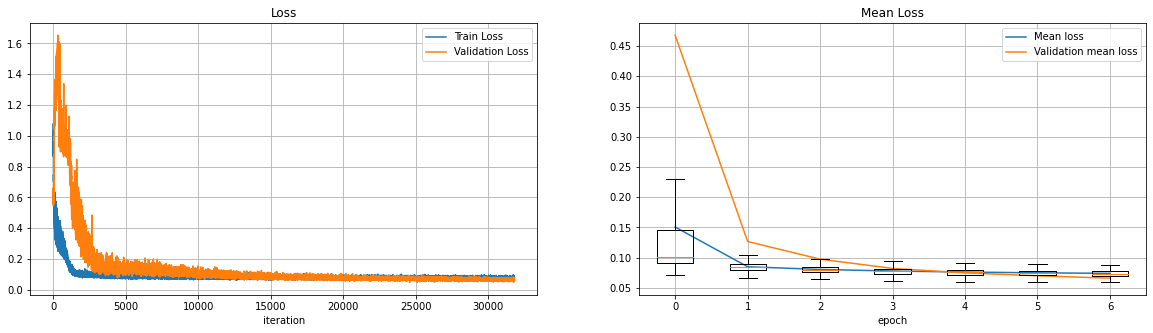

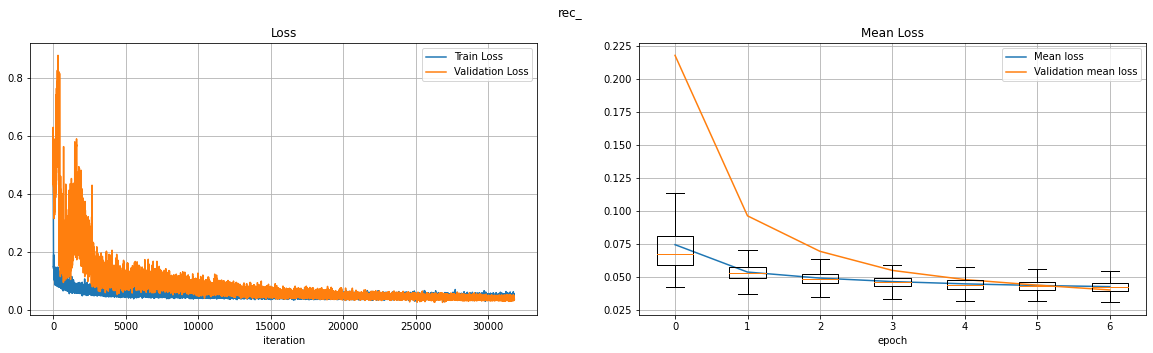

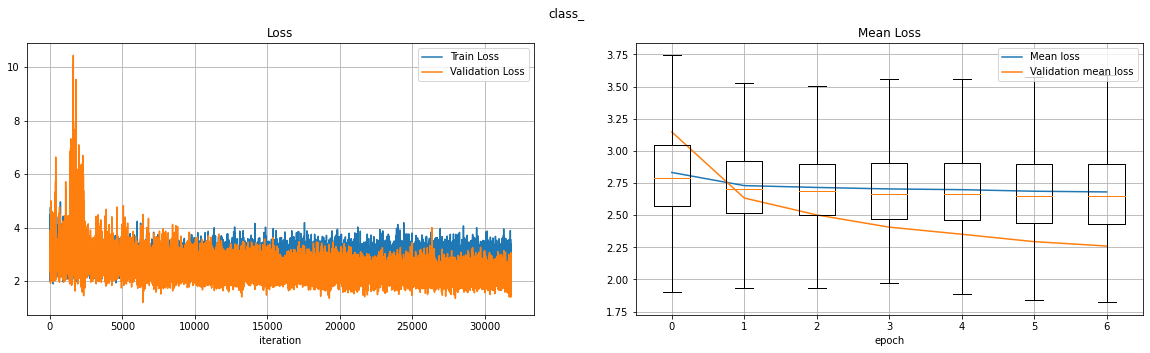

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


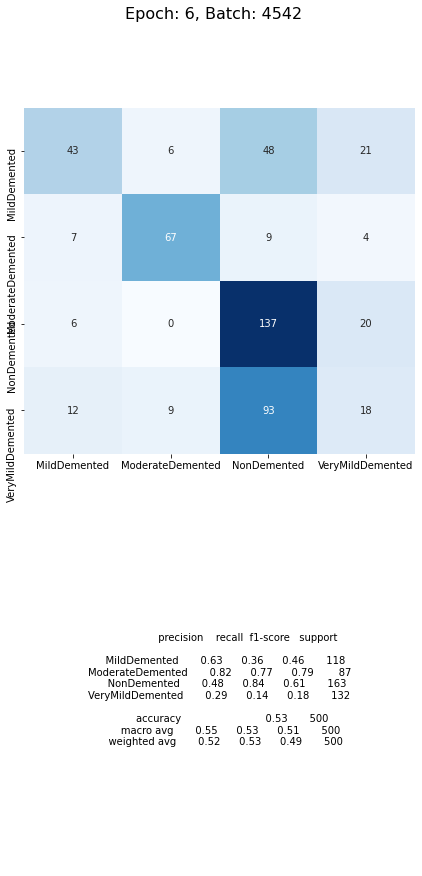

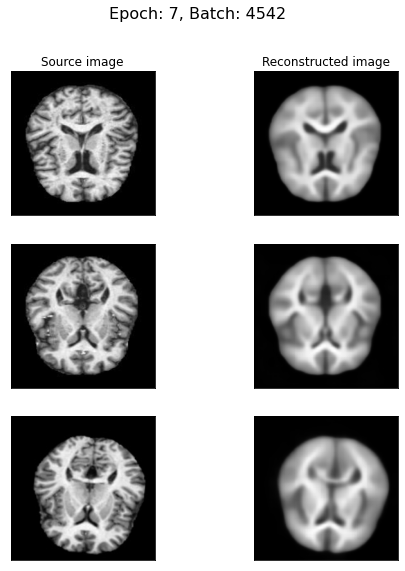

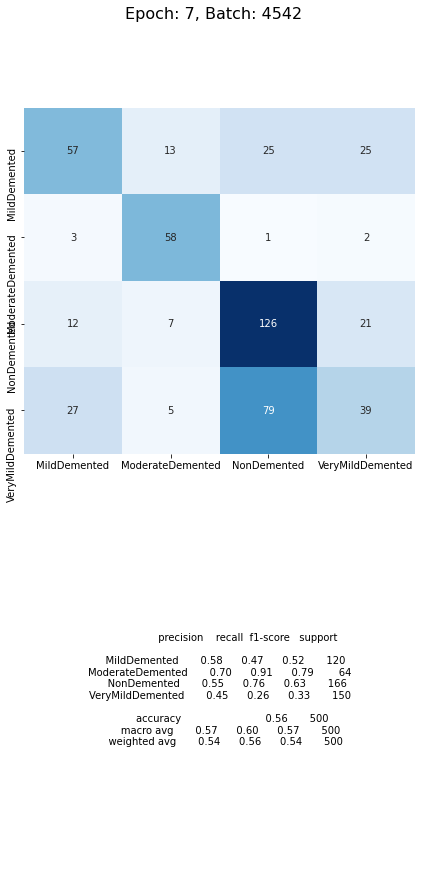

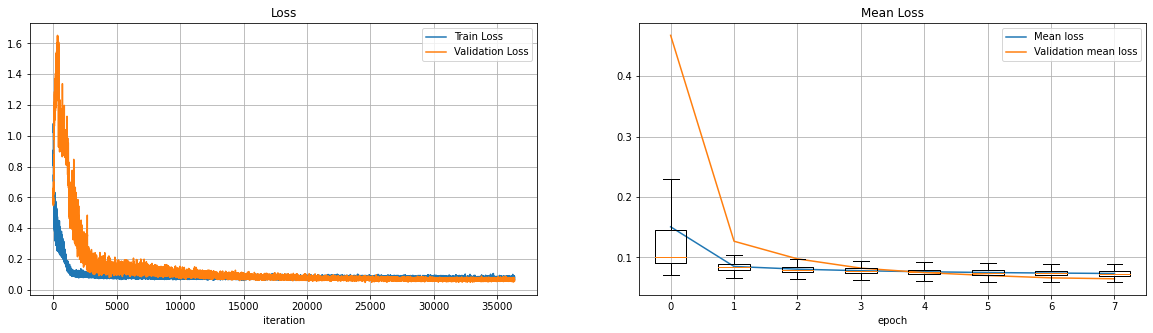

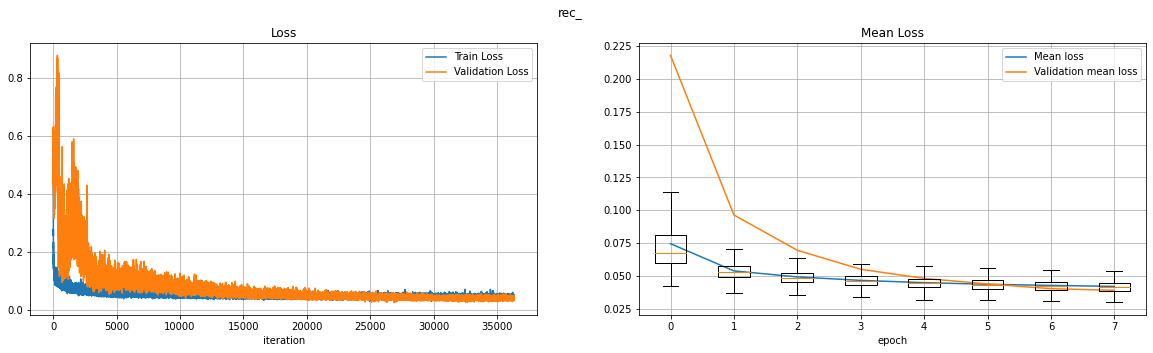

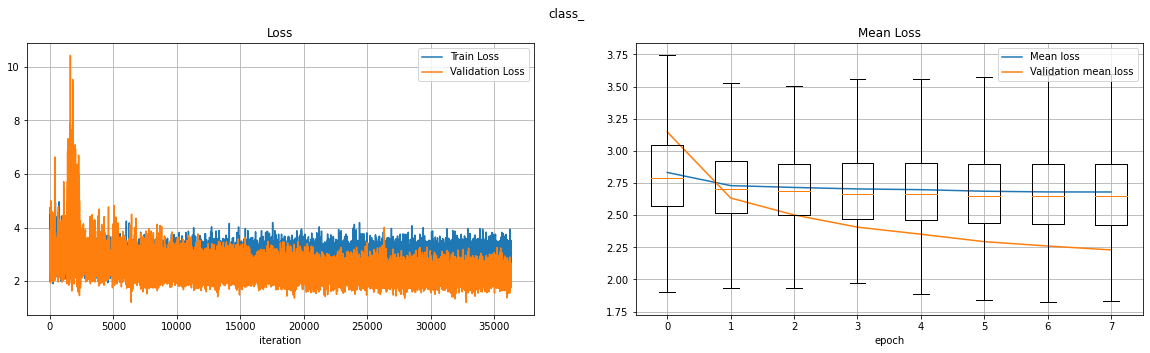

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


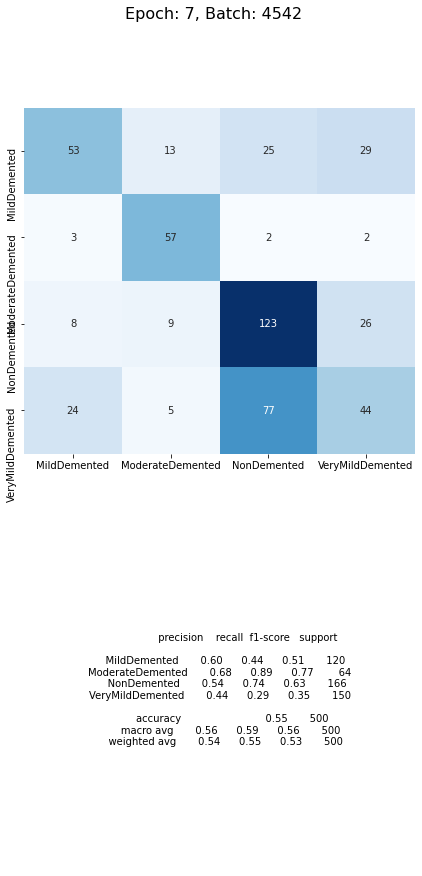

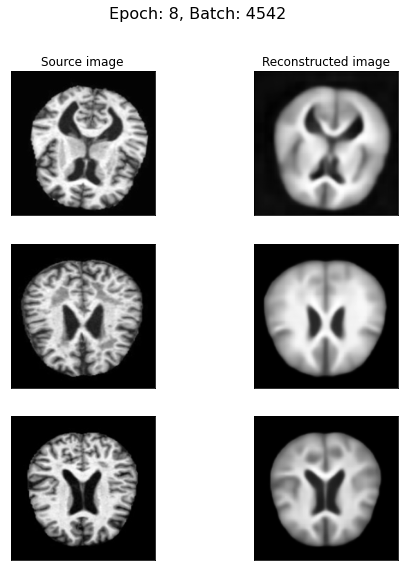

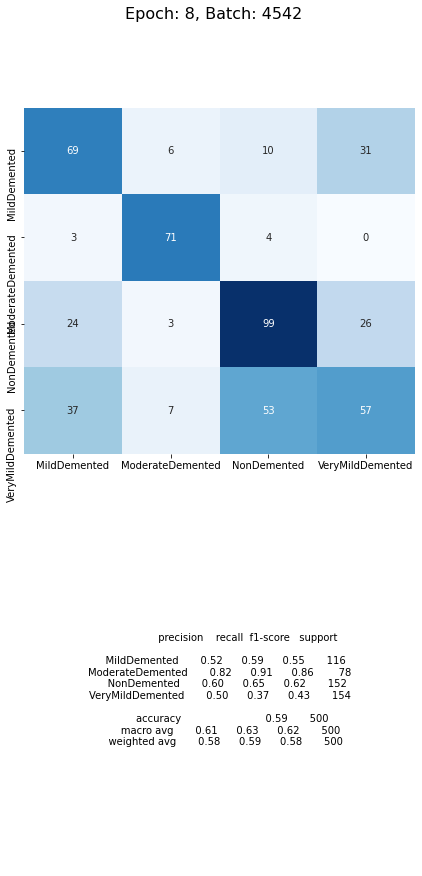

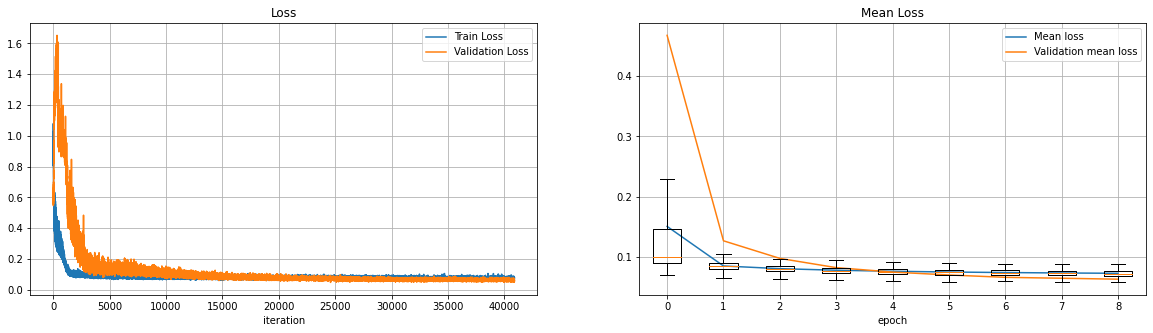

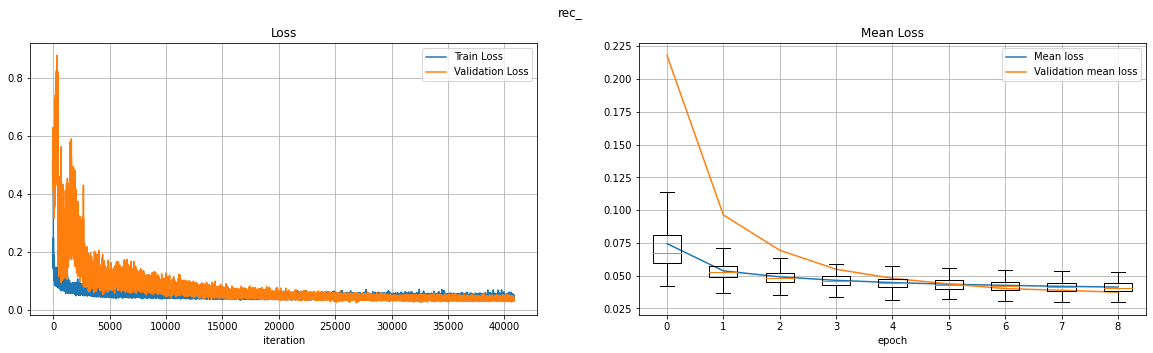

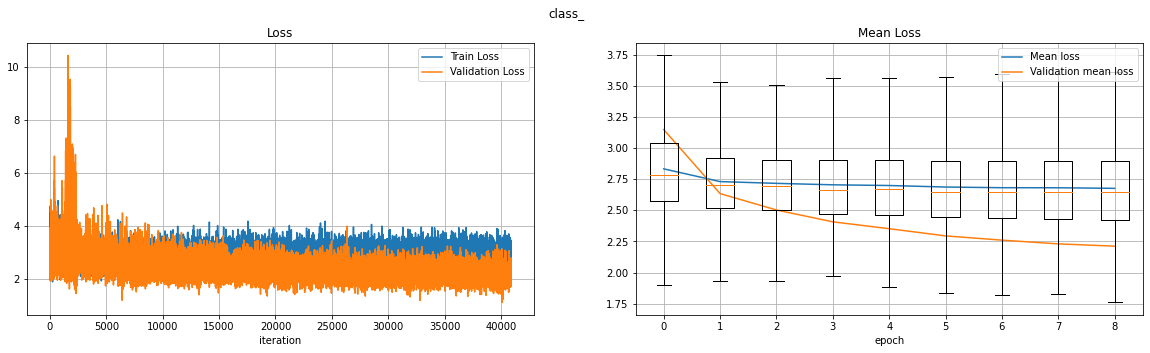

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


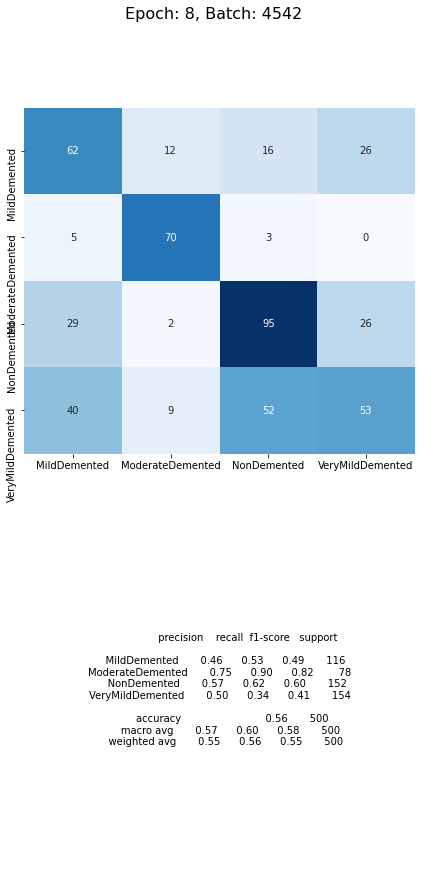

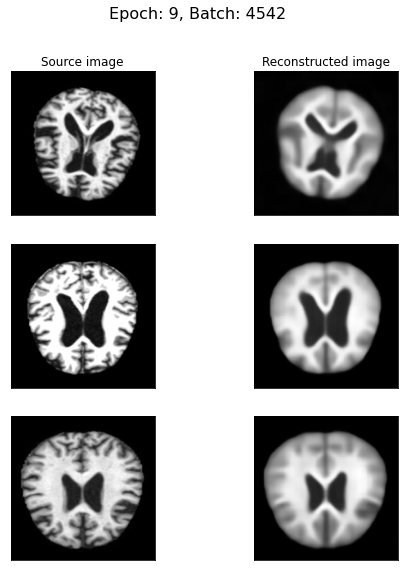

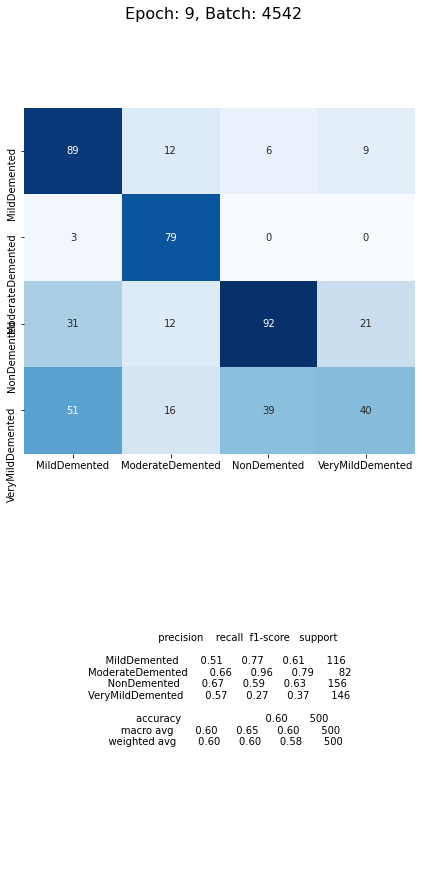

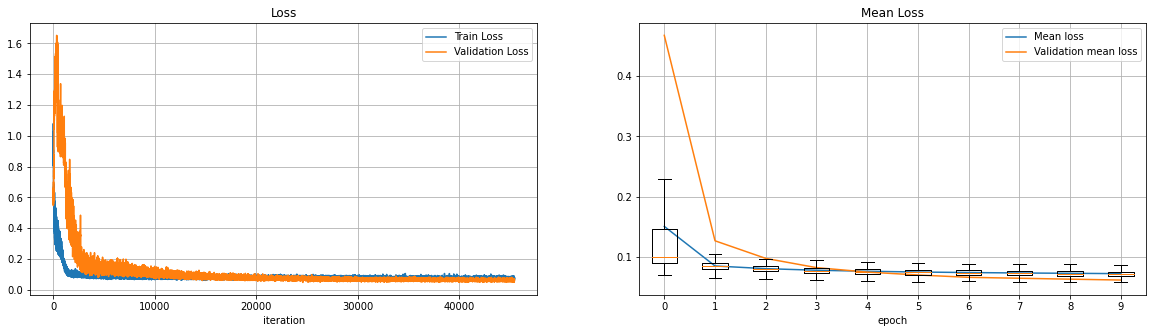

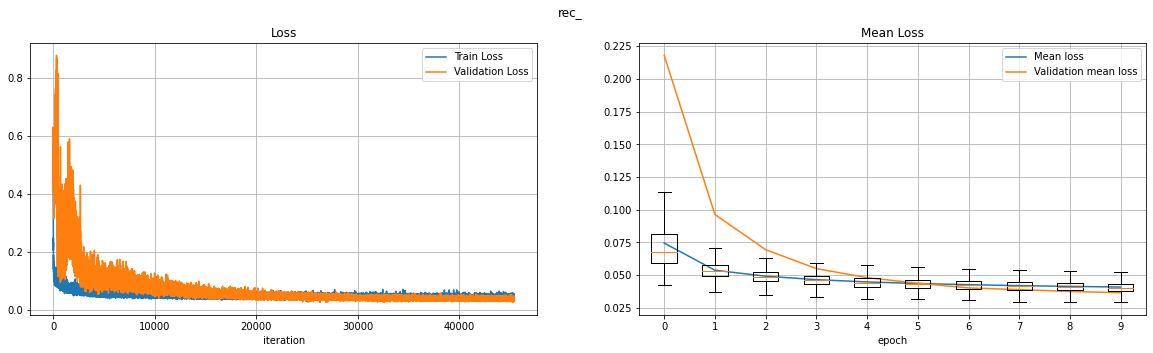

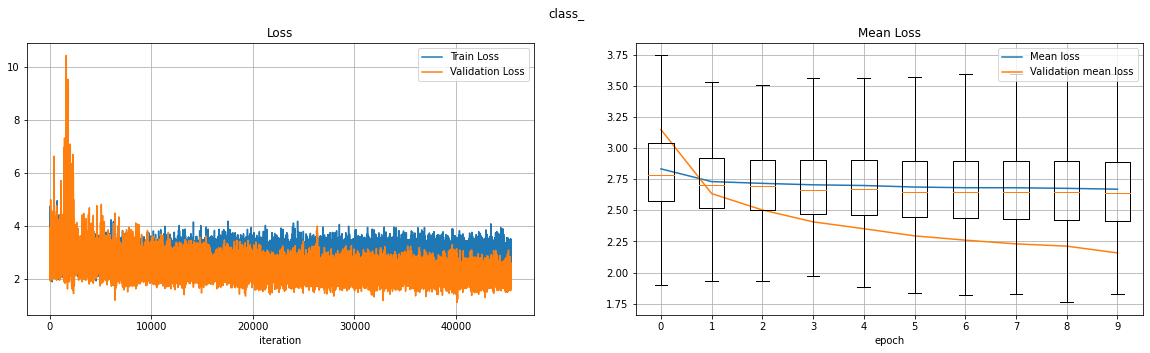

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


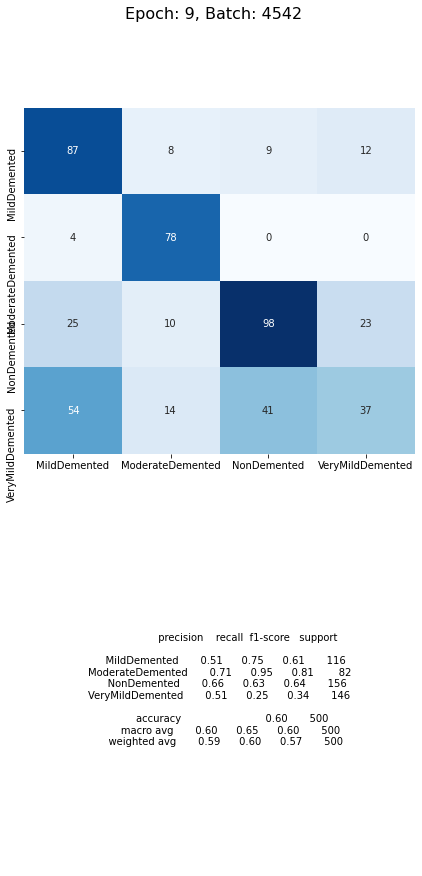

-----COMPILING MODEL-----
-----TRAIN START-----


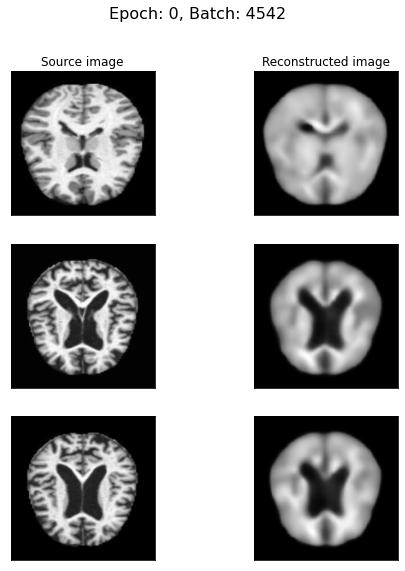

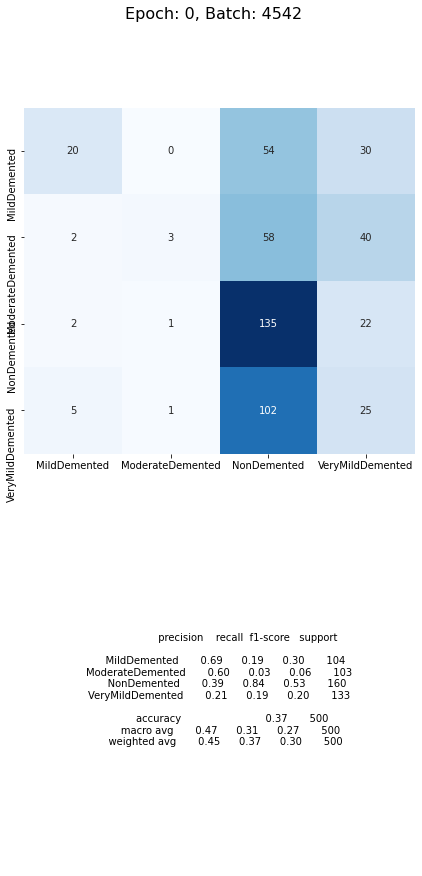

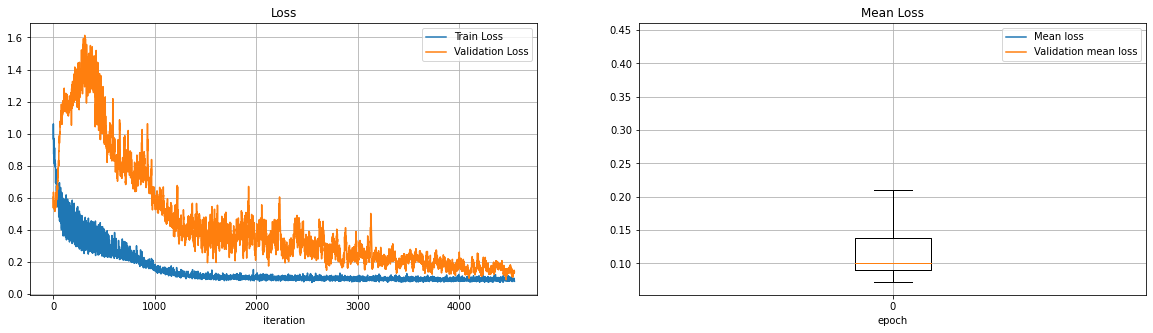

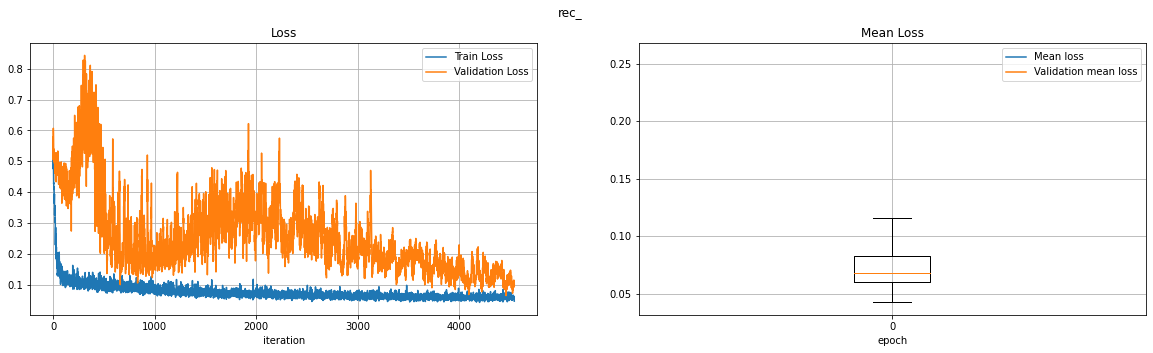

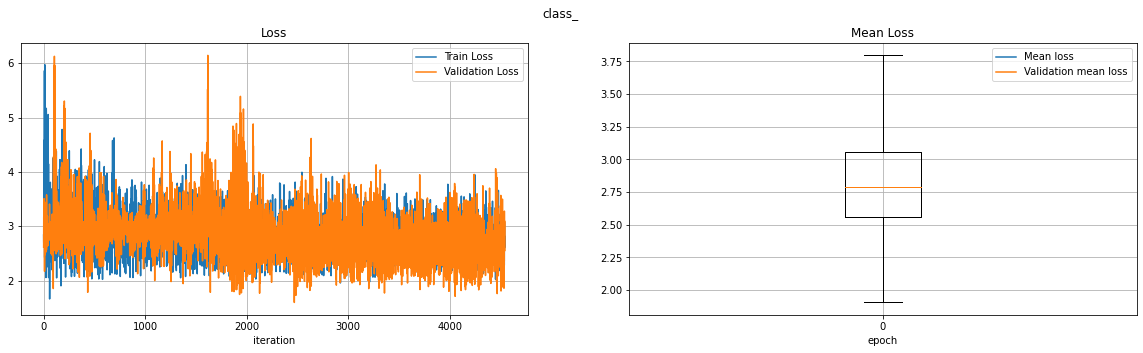

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


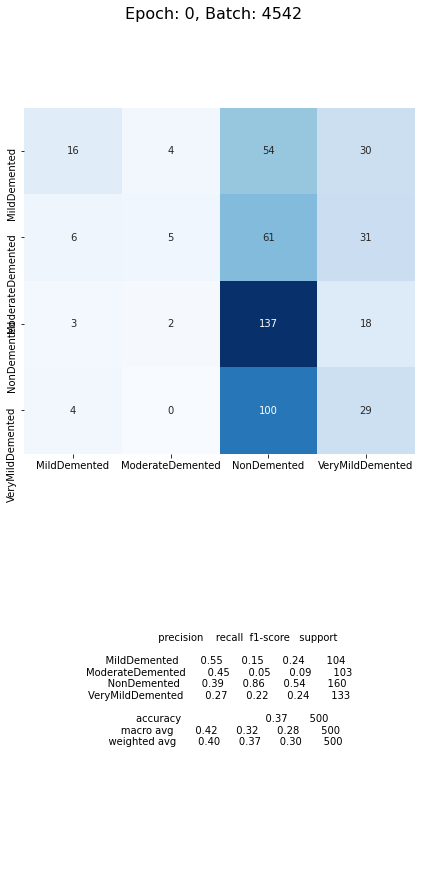

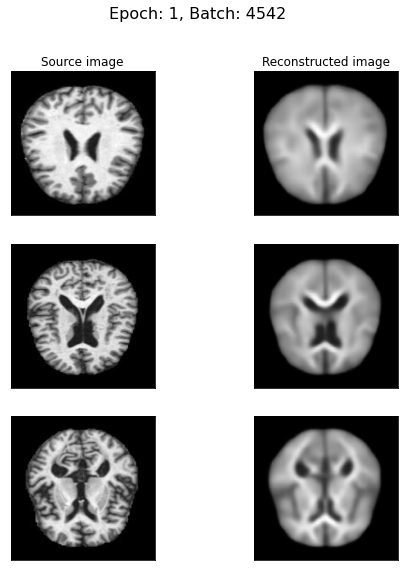

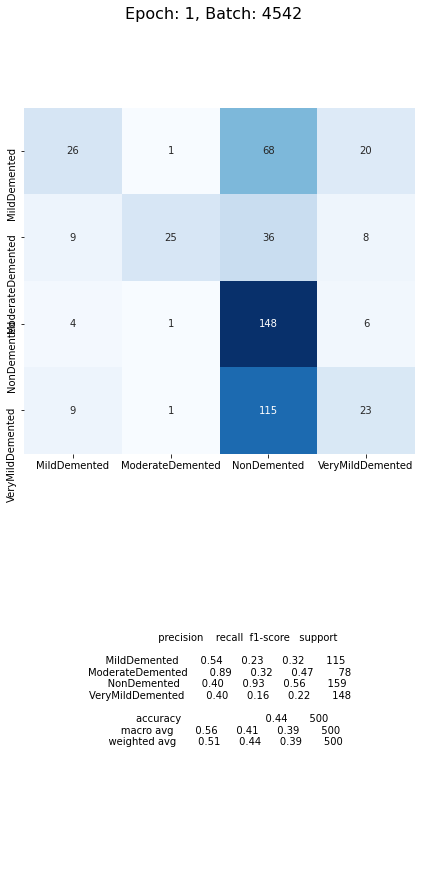

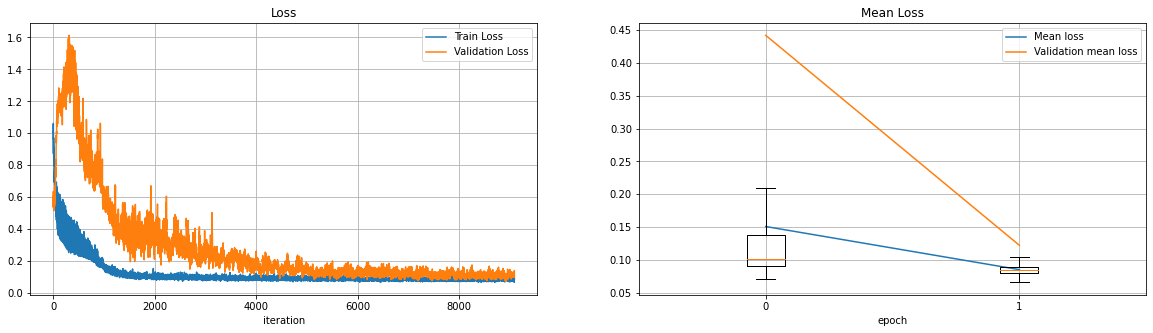

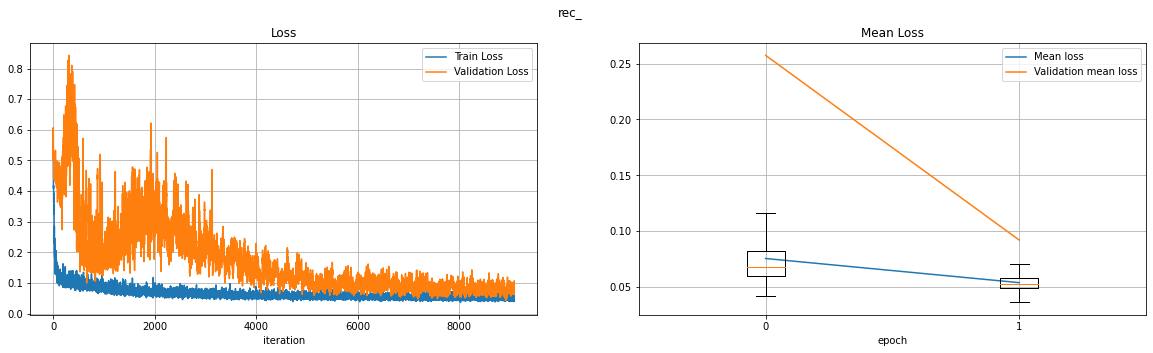

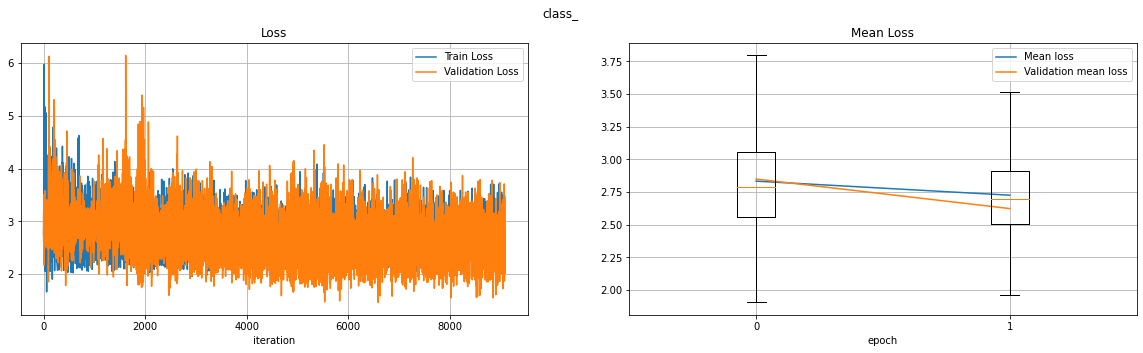

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


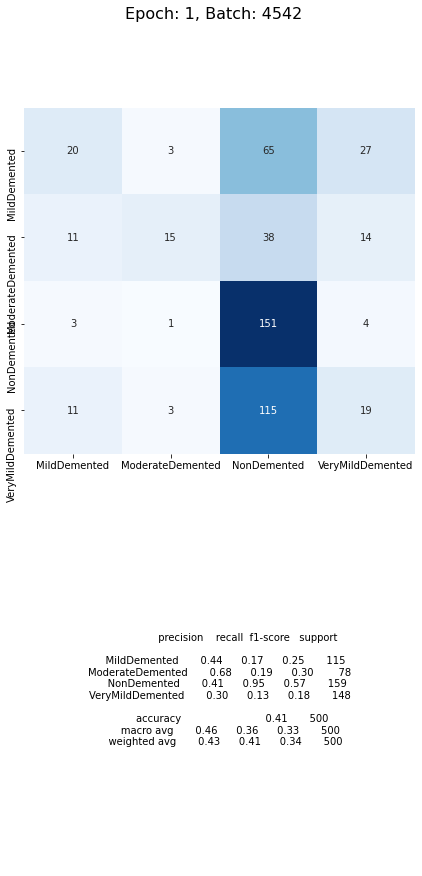

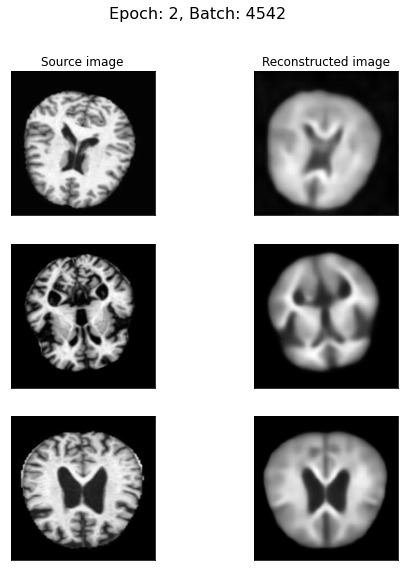

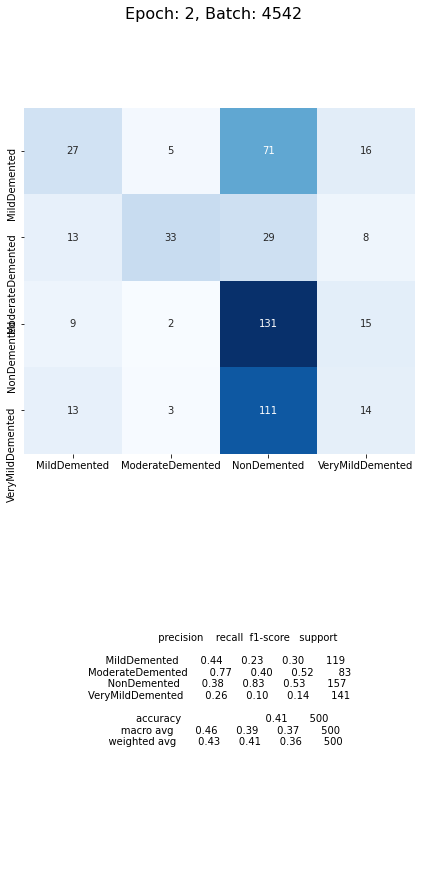

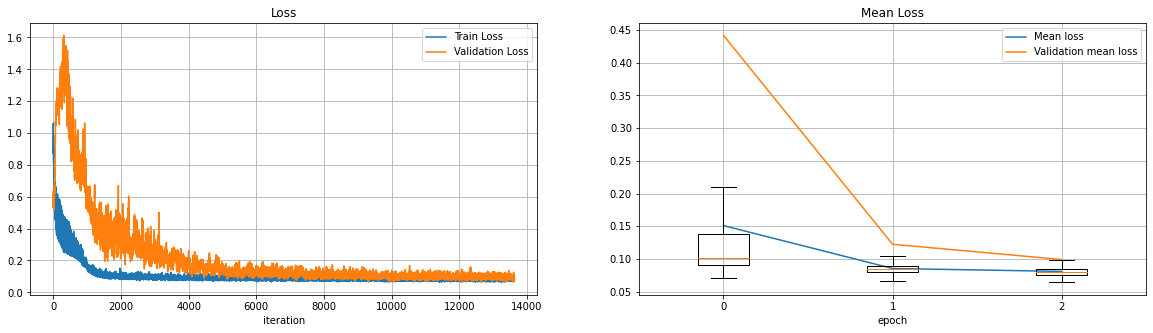

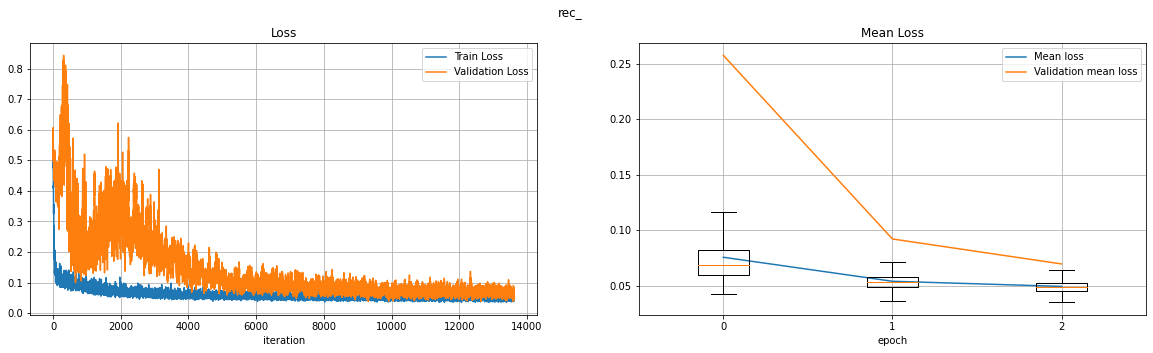

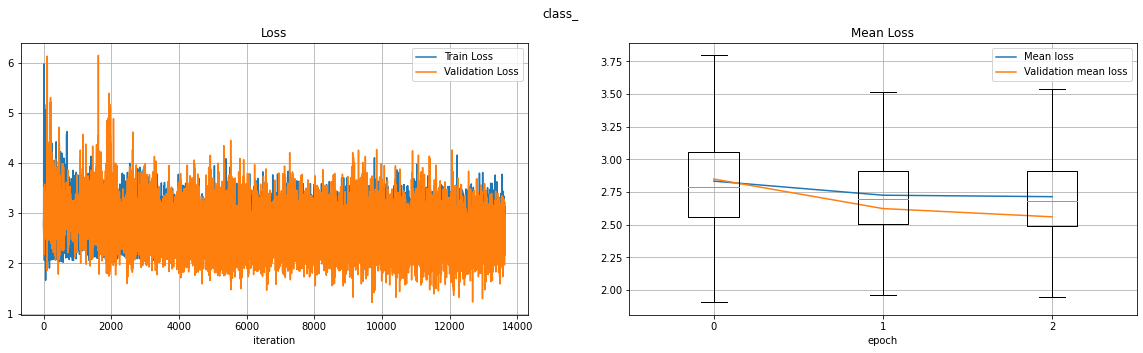

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


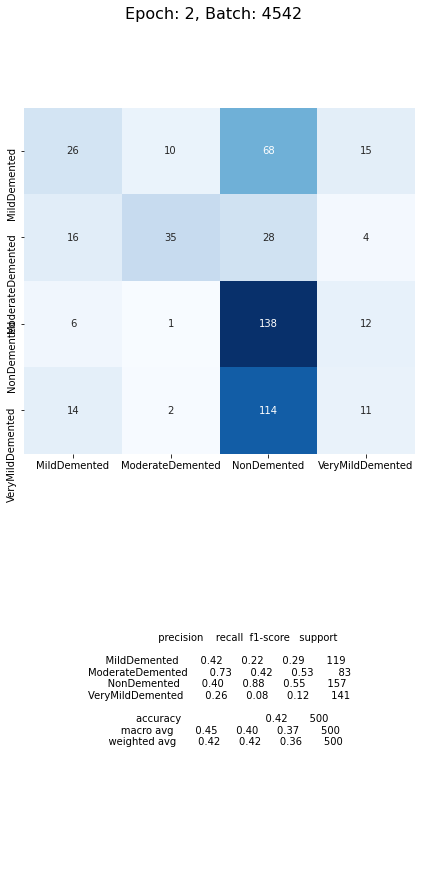

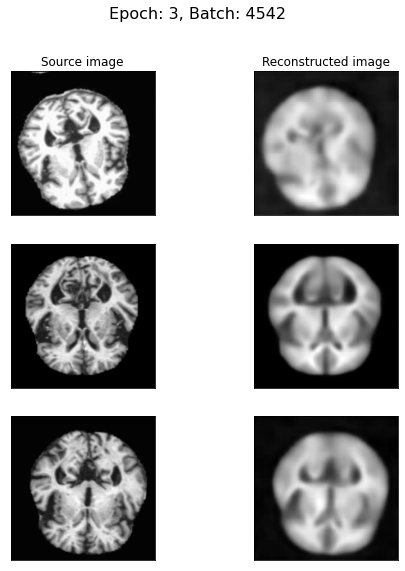

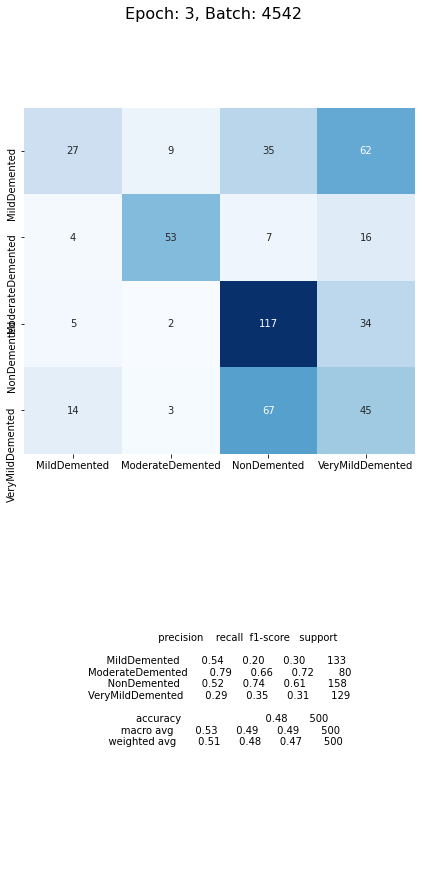

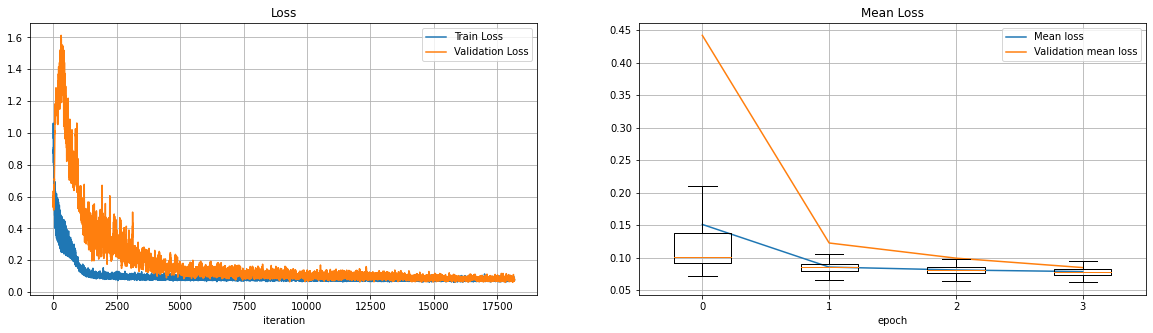

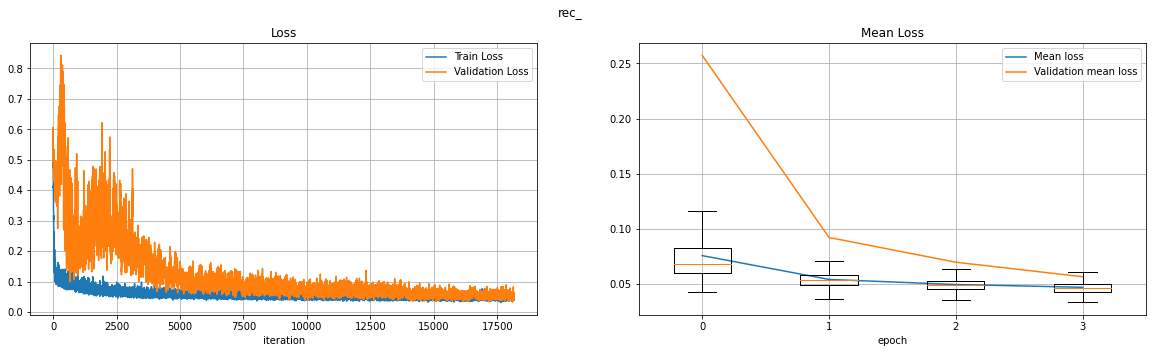

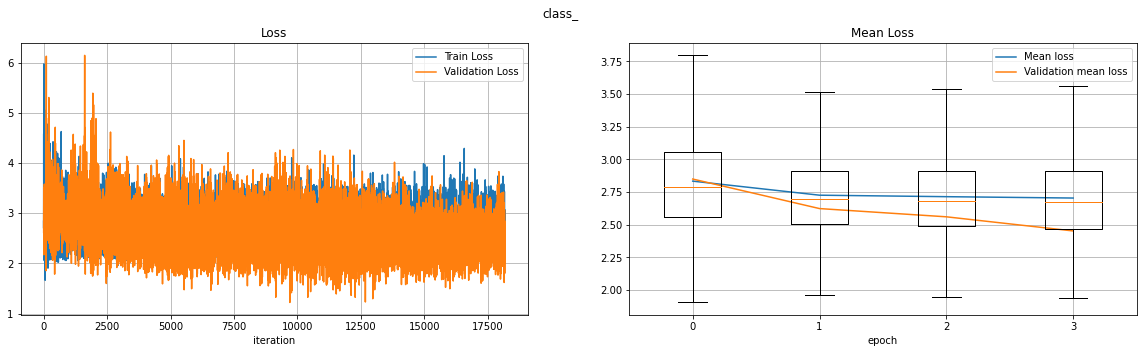

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


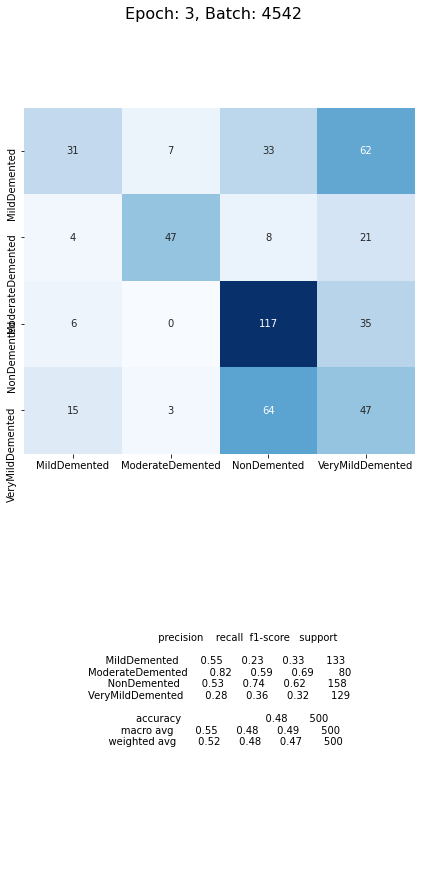

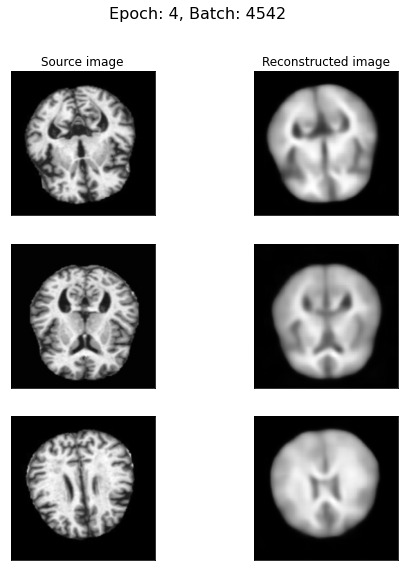

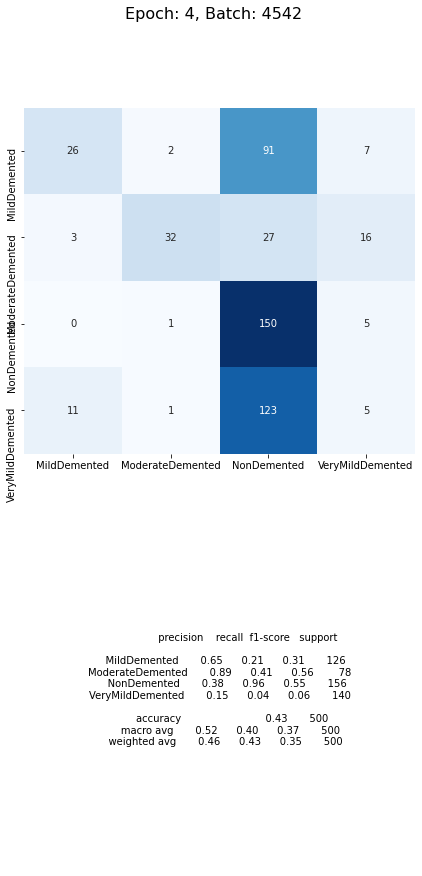

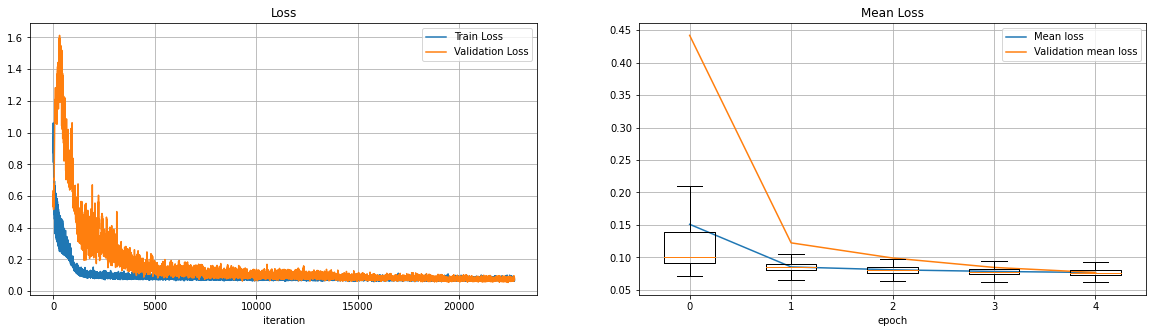

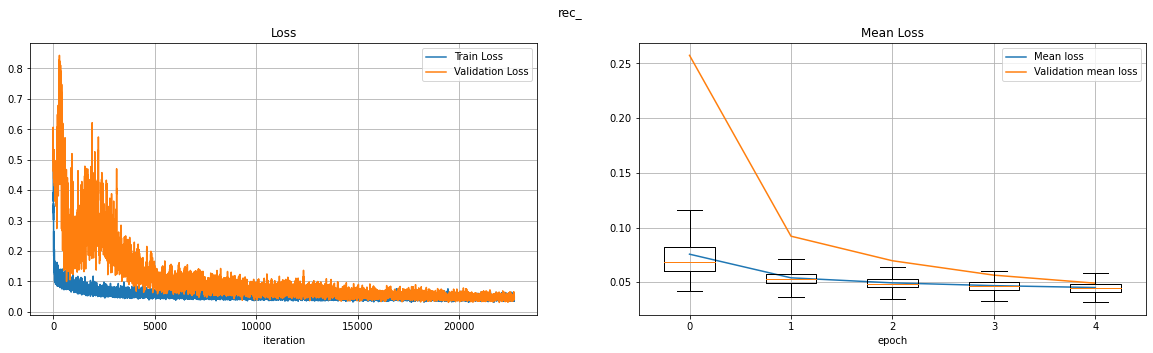

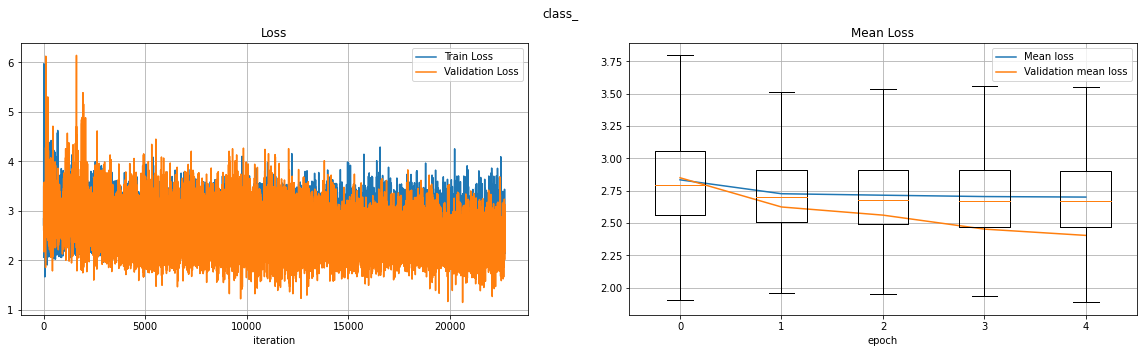

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


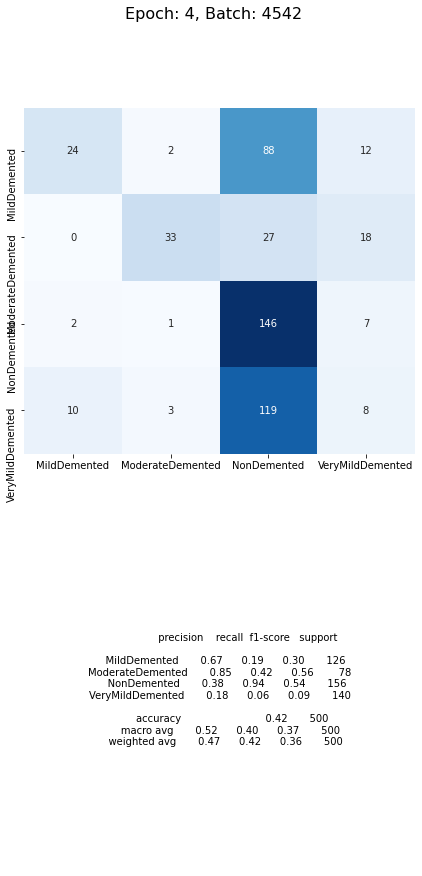

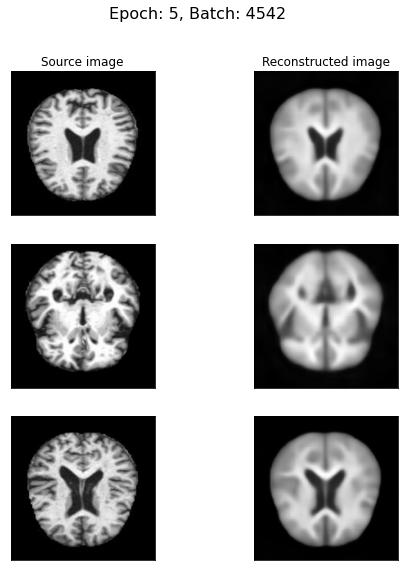

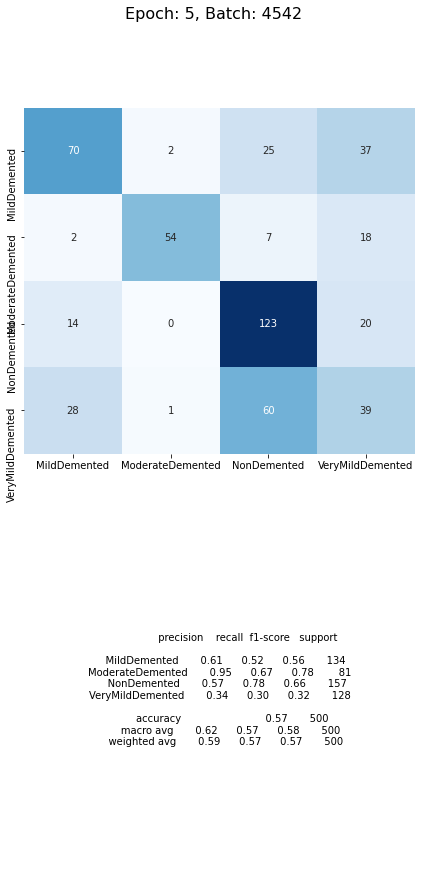

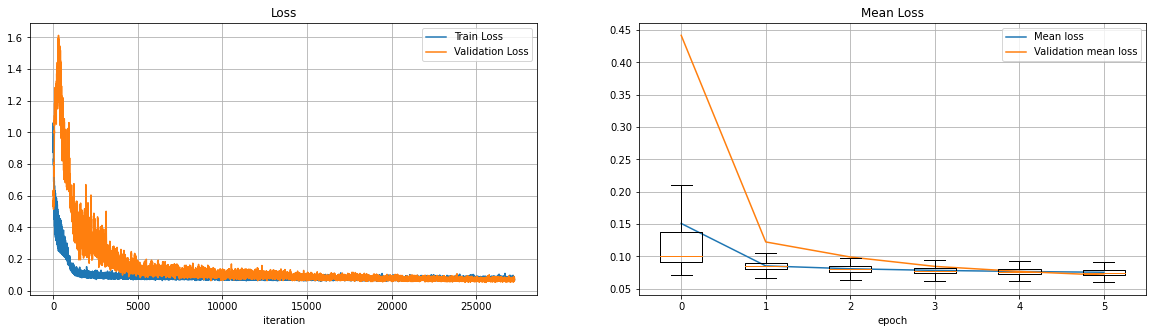

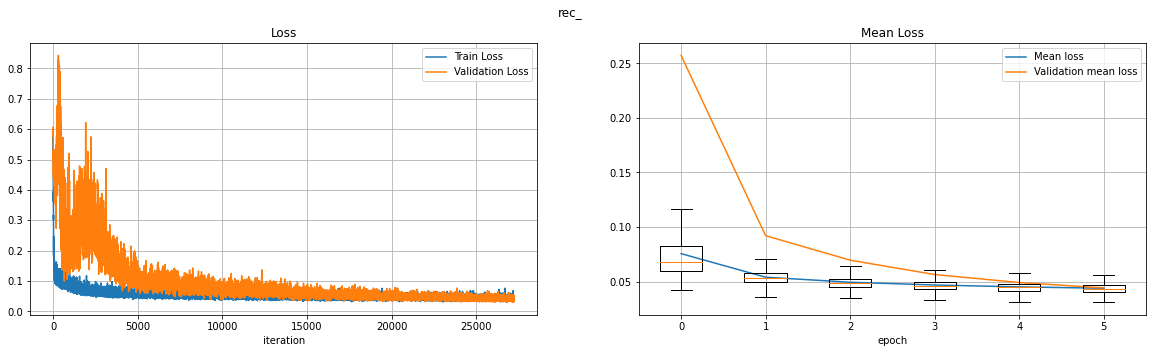

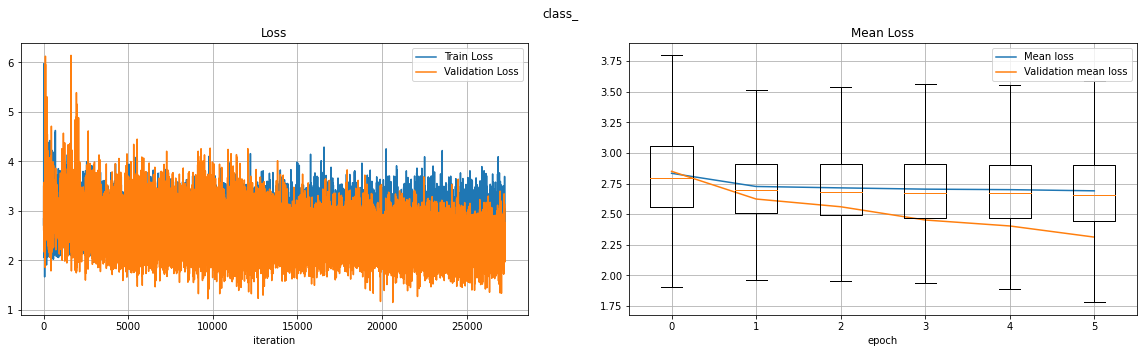

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


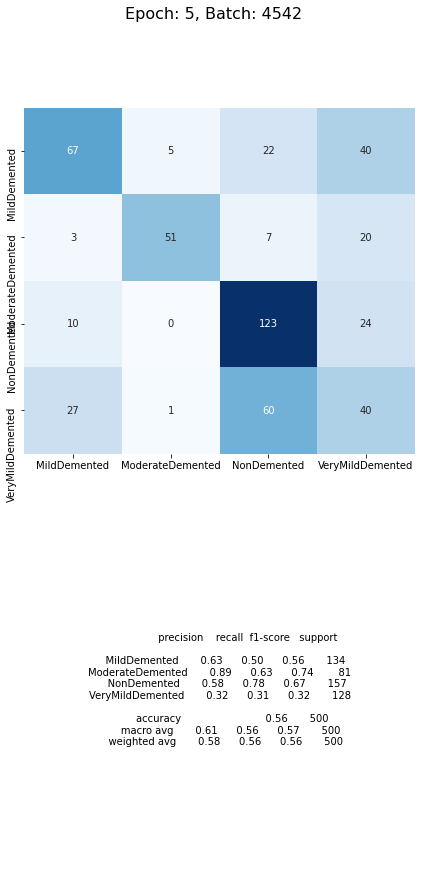

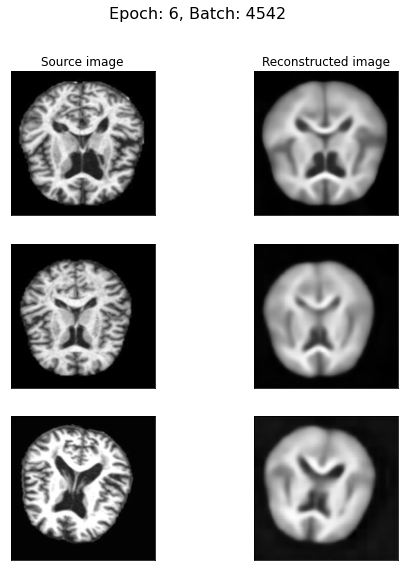

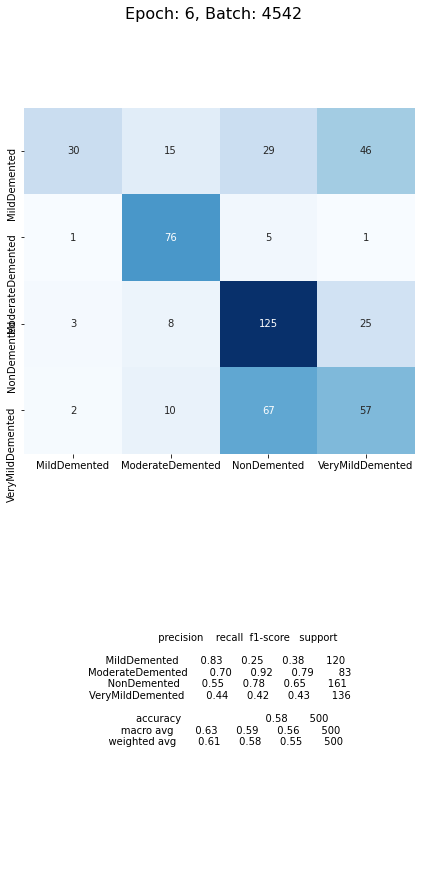

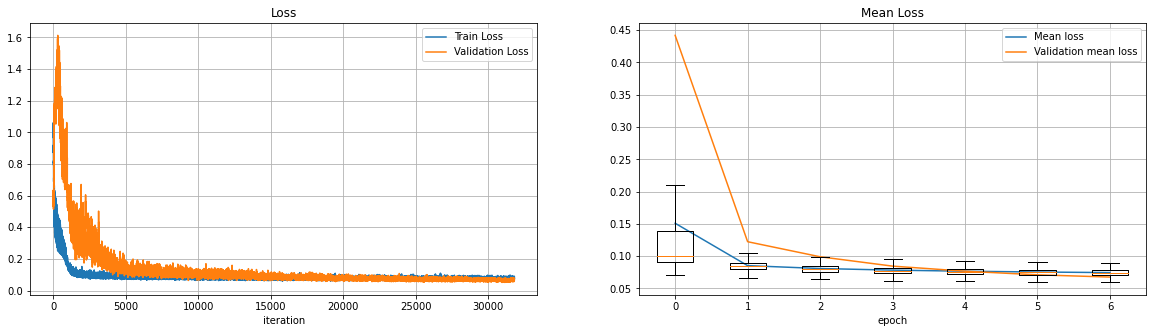

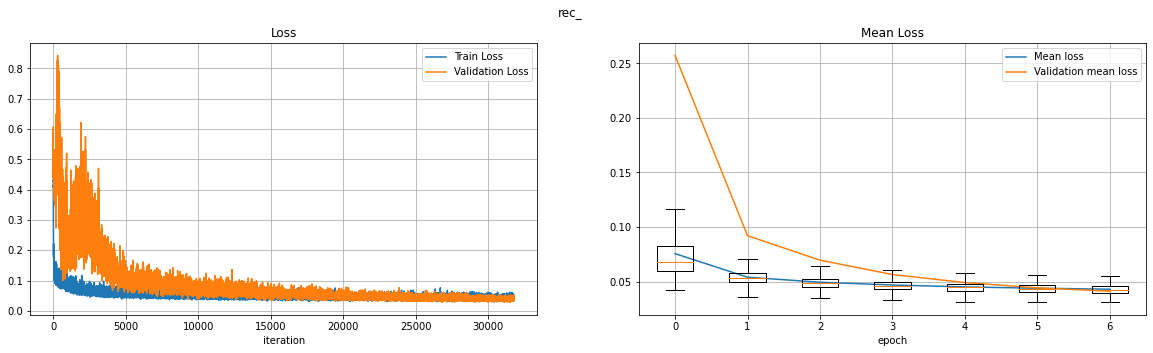

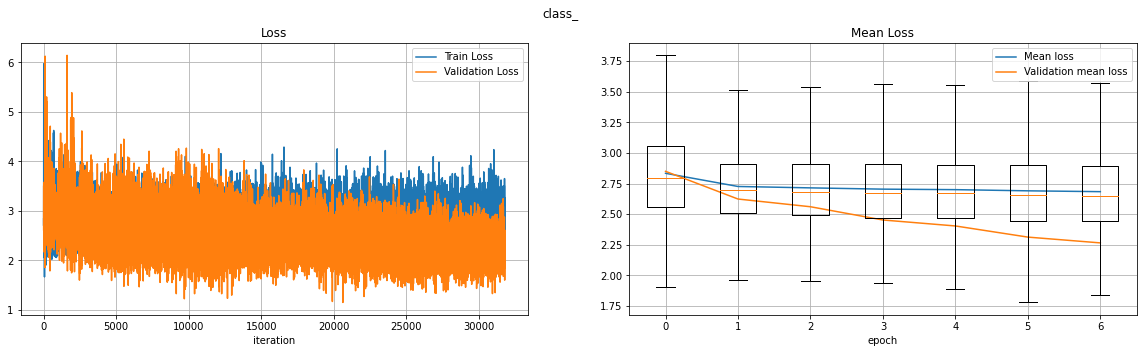

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


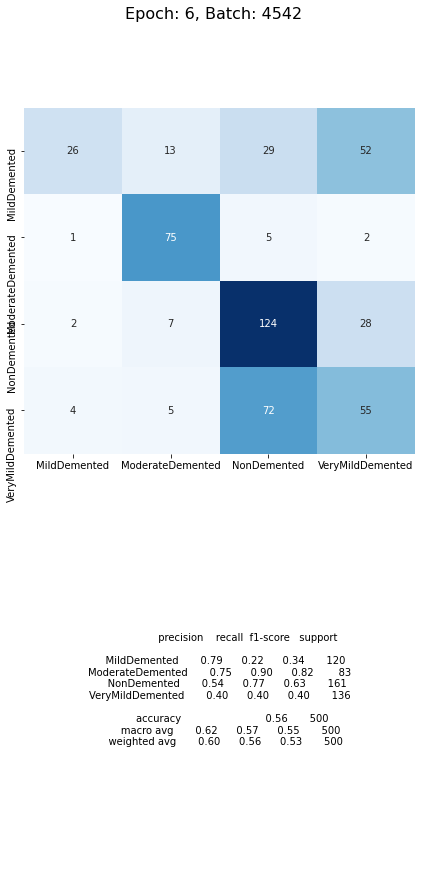

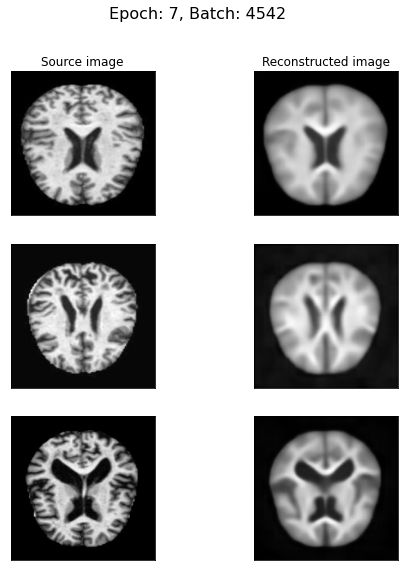

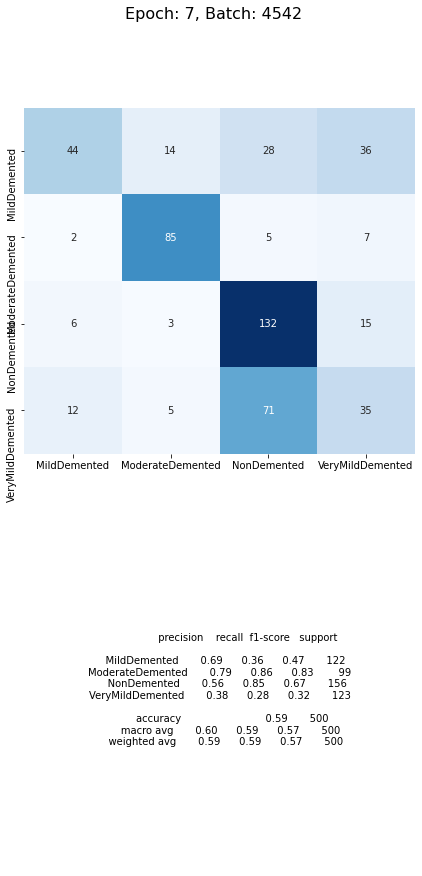

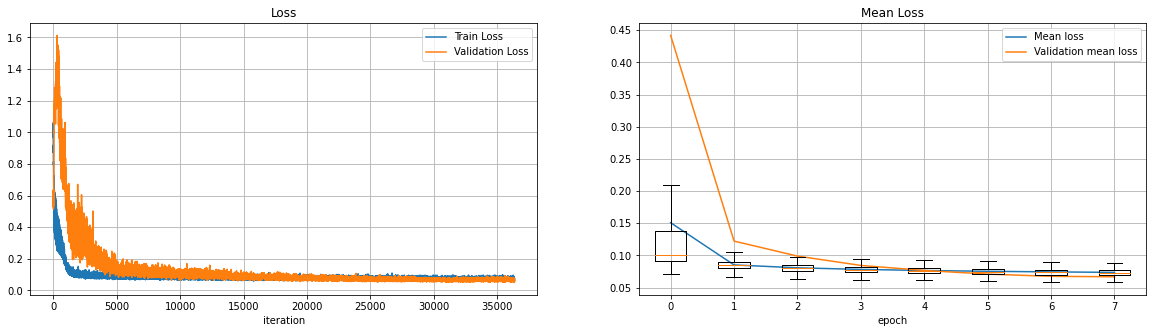

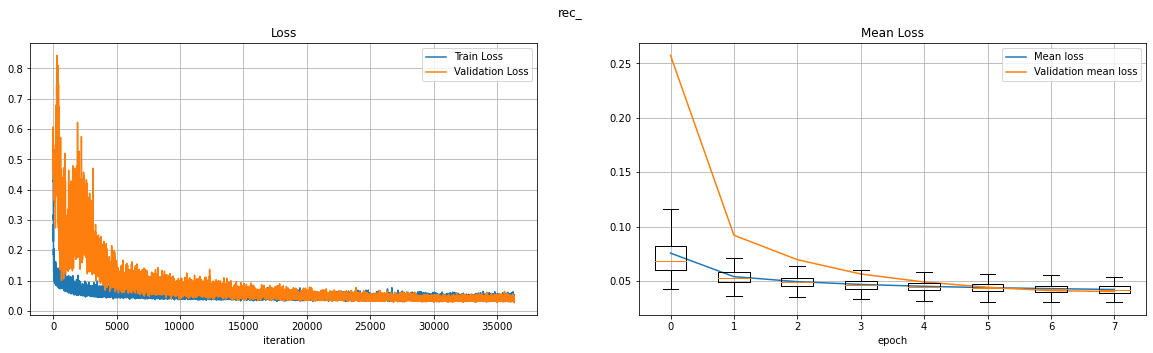

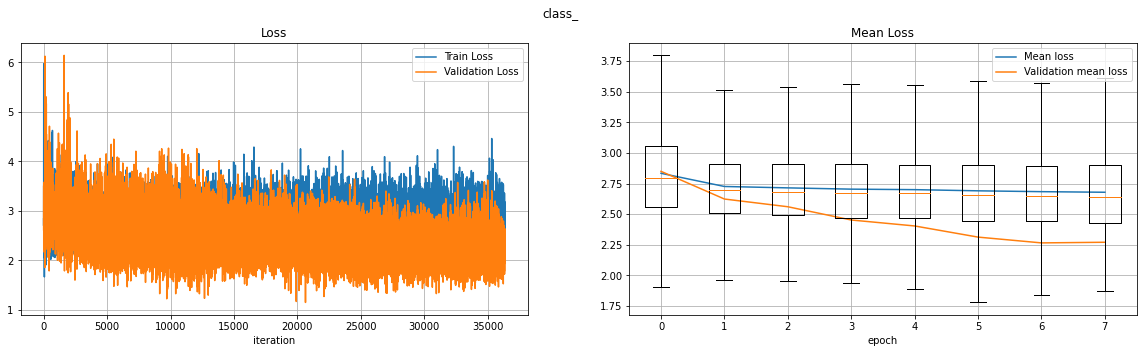

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


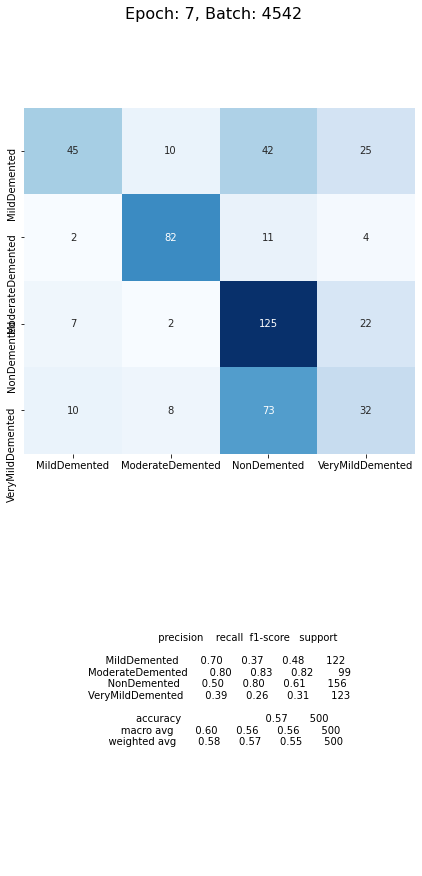

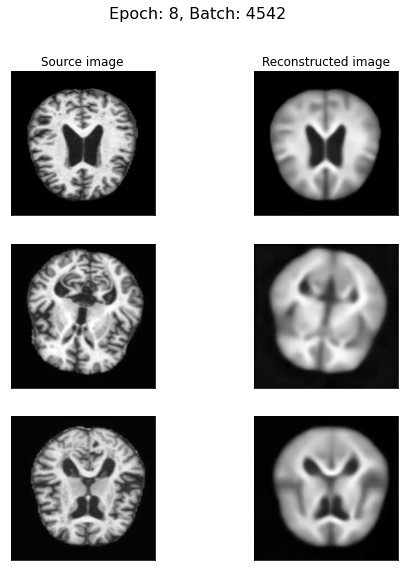

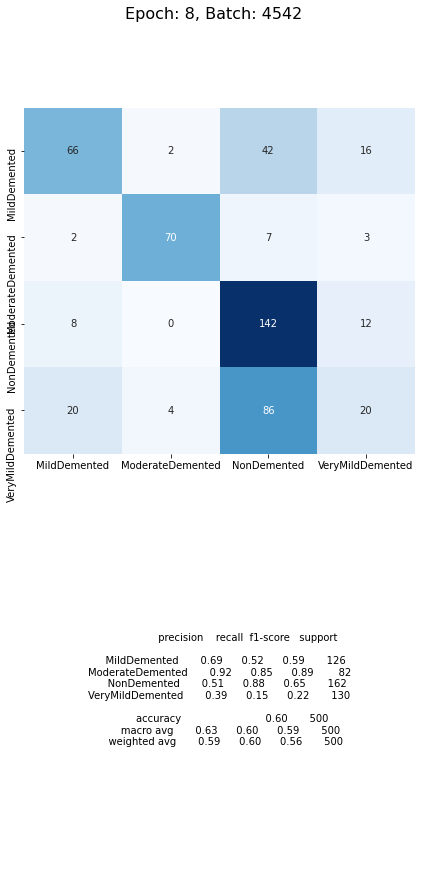

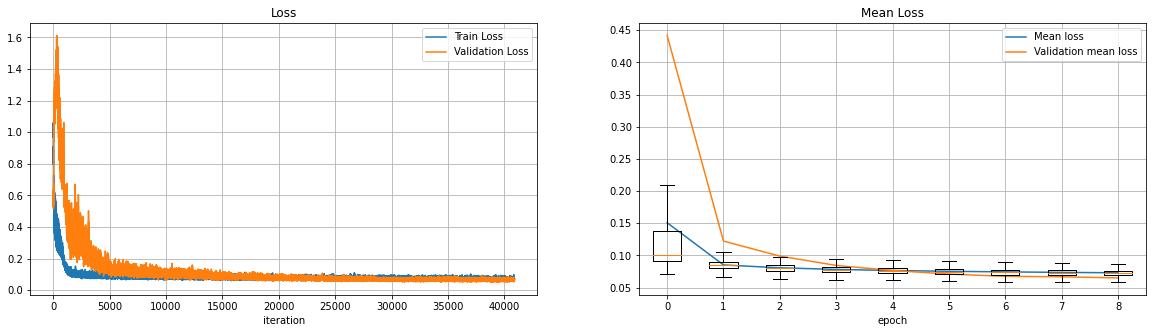

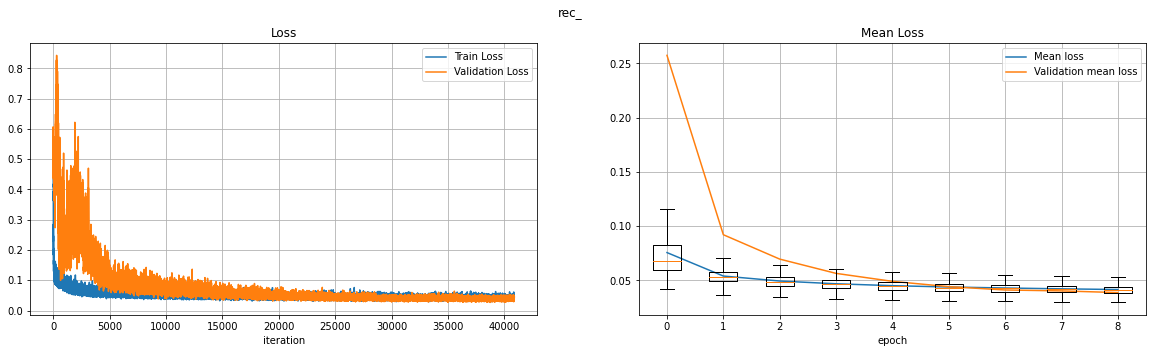

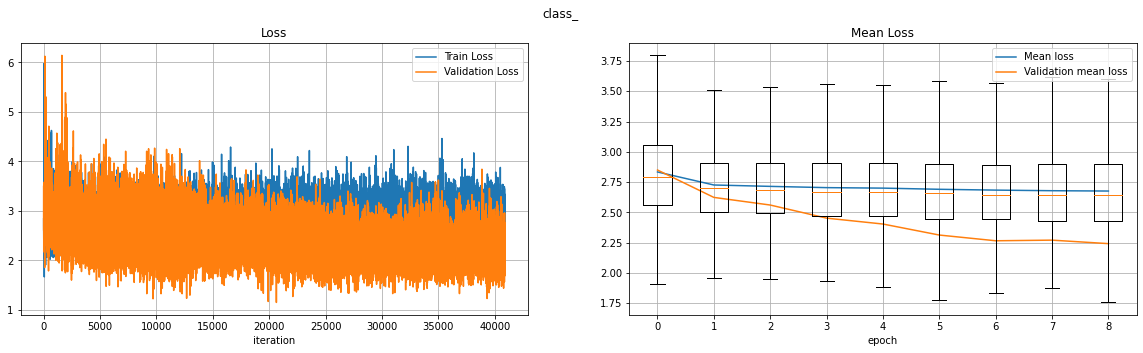

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


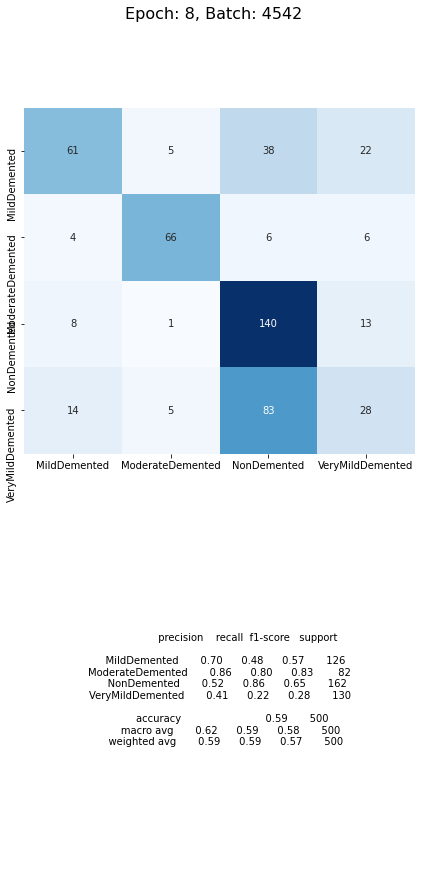

In [ ]:
for j in range(1, 11):
    out_path = os.path.join(output_dir, f"MOCVAE_{j}/")
    os.makedirs(os.path.join(out_path, "conf_matrix"), exist_ok=True)
    os.makedirs(os.path.join(out_path, "models"), exist_ok=True)
    os.makedirs(os.path.join(out_path, "reconstructions"), exist_ok=True)
    os.makedirs(os.path.join(out_path, "nn_recommendations"), exist_ok=True)

    model = DL_Model()
    model.create_mocvae()

    train(data_noisy, out_path, model, "mocvae", gamma=0.01)